# **********************************
# Sample code 1: TSP Problem
# **********************************

In [1]:
import math
import time
import os
from itertools import permutations

In [2]:
def tsp1(city_distance):
    try_no = 0
    num_of_city = len(city_distance)
    min_path = []
    min_length = 0
    next_city = 0
    for counter in range(num_of_city):
        try_no += 1
        target = next_city
        min_path.append(next_city)
        shortest = max(city_distance[next_city]) + 1
        for city in range(num_of_city):
            try_no += 1
            if city_distance[next_city][city] < shortest and city != next_city and city not in min_path:
                shortest = city_distance[next_city][city]
                target = city
        next_city = target
        if len(min_path) < num_of_city:
            min_length += shortest
    min_path.append(0)
    min_length += city_distance[next_city][0]
    min_path = [i + 1 for i in min_path]
    try_no += len(min_path)
    answer = {'length': min_length, 'path': min_path, 'try': try_no}
    return answer

In [3]:
def tsp2(city_distance):
    try_no = 0
    num_of_city = len(city_distance)
    all_path = list(permutations(range(num_of_city)))
    for path_no in range(len(all_path)):
        try_no += 1
        all_path[path_no] += (all_path[path_no][0],)
    all_path_length = []
    for path_no in range(len(all_path)):
        try_no += 1
        path_length = 0
        for city in range(len(all_path[path_no]) - 1):
            try_no += 1
            path_length += city_distance[all_path[path_no][city]][all_path[path_no][city + 1]]
        all_path_length.append(path_length)
    path_min_no = all_path_length.index(min(all_path_length))
    min_path = [i + 1 for i in all_path[path_min_no]]
    try_no += len(all_path)
    min_length = min(all_path_length)
    answer = {'length': min_length, 'path': min_path, 'try': try_no}
    return answer

In [4]:
# file = open('data_tsp.txt', 'r')
file = open('data2_tsp.txt', 'r')
x, y = [], []
location = []
next(file)
for l in file:
    point = []
    row = l.split()
    x.append(int(row[0]))
    y.append(int(row[1]))
    location.append([int(row[0]), int(row[1])])
num_of_city = len(location)
city_distance = []
for first_city in range(num_of_city):
    row = []
    for second_city in range(num_of_city):
        dist_row = math.dist([x[first_city], y[first_city]], [x[second_city], y[second_city]])
        row.append(dist_row)
    city_distance.append(row)
print(row[i] for i in range(num_of_city))
print(city_distance)
print('Number of cities:', num_of_city)
print('location of cities:', location)
print('----------------------------------------------------------')
print('nearest- neighbor heuristic algorithm:')
print('This algorithm is fast but not guaranteed to find an optimal tour')
start = time.time()
answer = tsp1(city_distance)
end = time.time()
print('Shortest path:', answer['path'])
print('Shortest path length:', answer['length'])
print('number of try:', answer['try'])
print('Runtime of the program:', end - start, 'seconds')
print('----------------------------------------------------------')
print('2. very slow algorithm:')
print('This algorithm tries all permutations and guaranteed optimal solution but is very slow')
start = time.time()
answer = tsp2(city_distance)
end = time.time()
print('Shortest path:', answer['path'])
print('Shortest path length:', answer['length'])
print('number of try:', answer['try'])
print('Runtime of the program:', end - start, 'seconds')

<generator object <genexpr> at 0x0000025AB160E5E0>
[[0.0, 102.2154587134451, 194.3733520830466, 17.11724276862369, 168.65645555388622, 197.3448757885545, 152.75143207184672, 72.61542535852834, 184.58873205046942, 199.42417105255822, 60.40695324215582], [102.2154587134451, 0.0, 188.904737897174, 116.29703349613007, 90.0499861188218, 181.8158408940211, 196.42046736529267, 156.84705926475002, 196.02295783912658, 165.0272704737008, 148.48905683584903], [194.3733520830466, 188.904737897174, 0.0, 189.52572384771415, 140.4563989286355, 18.973665961010276, 91.21403400793103, 164.07315441594946, 31.622776601683793, 54.74486277268398, 170.75128110793196], [17.11724276862369, 116.29703349613007, 189.52572384771415, 0.0, 176.81628884240274, 194.09276132818556, 140.91131963046828, 56.356011214421486, 177.2004514666935, 199.27117202445515, 43.86342439892262], [168.65645555388622, 90.0499861188218, 140.4563989286355, 176.81628884240274, 0.0, 126.14277624977183, 189.52572384771415, 194.83326204732086,

# **********************************
# Sample code 2: Maze Problem
# **********************************

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import namedtuple
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import string
def convert_node_id_to_name(id, max_room):
    name=""
    if id==max_room+1: return 'Goal'
    for i in range(int((id-1)/26)+1):
        name=name+list(string.ascii_uppercase)[(id-1)%26]
        id=id-26
    return name
condition=namedtuple("State","R L")
primary_graph = DAG_of_states= nx.DiGraph()
file = open("input_maze.txt")
nodes, edges = file.readline().replace("\n", "").replace("\r", "").split(" ")
colors = file.readline().replace("\n", "").replace("\r", "").split(" ")
rooms_no = len(colors)
for i in range(rooms_no): primary_graph.add_node(i, color=colors[i])
primary_graph.add_node(rooms_no, color='Orange')
Rocket_start_node, Lucky_start_node = file.readline().replace("\n", "").replace("\r", "").split(" ")
Rocket_start_node = int(Rocket_start_node) - 1
Lucky_start_node = int(Lucky_start_node) - 1
for i in range(int(edges)):
    edge = file.readline().replace("\n", "").replace("\r", "").split(" ")
    edge_start=int(edge[0]) - 1
    edge_end=int(edge[1]) - 1
    edge_color=str(edge[2])
    primary_graph.add_edge(edge_start, edge_end, color=edge_color)
check_room=[[0 for i in range(rooms_no + 1)] for j in range(rooms_no + 1)]
def DAG(instant_condition):
    if check_room[instant_condition[0]][instant_condition[1]]!=0:
        return
    check_room[instant_condition[0]][instant_condition[1]]=instant_condition
    for left in list(primary_graph.adj.items())[instant_condition[0]][1]:
        if primary_graph.edges()[(instant_condition[0], left)]['color'] == primary_graph.nodes()[instant_condition[1]]['color']:
            next_condition = condition(left, instant_condition[1])
            DAG_of_states.add_node(next_condition)
            if check_room[next_condition[0]][next_condition[1]] == 0:
                DAG_of_states.add_edge(instant_condition, next_condition)
            DAG(next_condition)
    for right in list(primary_graph.adj.items())[instant_condition[1]][1]:
        if primary_graph.edges()[(instant_condition[1], right)]['color']==primary_graph.nodes()[instant_condition[0]]['color']:
            next_condition=condition(instant_condition[0],right)
            DAG_of_states.add_node(next_condition)
            if check_room[next_condition[0]][next_condition[1]]==0:
                DAG_of_states.add_edge(instant_condition, next_condition)
            DAG(next_condition)
DAG(condition(0,1))
tree=list(nx.bfs_predecessors(DAG_of_states, condition(R=0, L=1)))
def moving_turn(state_list,s):
    if state_list[0][0]==state_list[1][0]:
        return('L ' + str(state_list[0][1]+1) +'\t// Lucky moves to ' + convert_node_id_to_name(state_list[0][1] + 1, s))
    else:
        return('R ' + str(state_list[0][0]+1) +'\t// Rocket moves to ' + convert_node_id_to_name(state_list[0][0] + 1, s))
solve = "No"
path = []
for i in range(len(tree)):
    if solve=="No" and tree[-i - 1][0][0] or tree[-i - 1][0][1] == rooms_no:
        solve = "Yes"
        path.append(moving_turn(tree[-i - 1], rooms_no))
        index = i
    if solve == "Yes" and tree[-i - 1][0] == tree[-index - 1][1]:
        index = i
        path.append(moving_turn(tree[-i - 1], rooms_no))
if solve=="Yes":
    for i in range(len(path)):
        print(path[-i - 1])
else:
    print("There isn't any solution for this problem")

L 7	// Lucky moves to G
R 10	// Rocket moves to J
L 11	// Lucky moves to K
R 15	// Rocket moves to O
L 6	// Lucky moves to F
R 14	// Rocket moves to N
L 2	// Lucky moves to B
R 8	// Rocket moves to H
L 7	// Lucky moves to G
R 4	// Rocket moves to D
L 11	// Lucky moves to K
R 1	// Rocket moves to A
L 6	// Lucky moves to F
R 10	// Rocket moves to J
L 2	// Lucky moves to B
R 15	// Rocket moves to O
L 7	// Lucky moves to G
R 14	// Rocket moves to N
L 11	// Lucky moves to K
R 8	// Rocket moves to H
L 6	// Lucky moves to F
R 4	// Rocket moves to D
L 2	// Lucky moves to B
L 3	// Lucky moves to C
R 1	// Rocket moves to A
L 12	// Lucky moves to L
R 10	// Rocket moves to J
L 17	// Lucky moves to Q
R 15	// Rocket moves to O
L 16	// Lucky moves to P
R 14	// Rocket moves to N
R 20	// Rocket moves to T
L 14	// Lucky moves to N
R 21	// Rocket moves to U
L 8	// Lucky moves to H
R 22	// Rocket moves to V
L 4	// Lucky moves to D
R 23	// Rocket moves to W
L 1	// Lucky moves to A
R 27	// Rocket moves to A

# ***************************************************
# Sample code 3: Car Insurance Claim Prediction
# ***************************************************

# 1-   Importing Libraries

In [7]:
import insurance_functions as fn
from scipy.stats import zscore
from sklearn.neighbors import NearestNeighbors
from sklearn.experimental import enable_iterative_imputer
import winsound
import time# 5- Modeling
from sklearn.impute import KNNImputer, IterativeImputer
import matplotlib.pyplot as plt
import random
import warnings
from collections import Counter
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, classification_report, roc_curve, plot_roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.ensemble import BaggingClassifier
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

c:\Users\Javad\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
warnings.filterwarnings('ignore')

# 2- Reading and Describing Dataset

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df=df.drop(columns=['ID'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [7]:
df.nunique()

AGE                       4
GENDER                    2
RACE                      2
DRIVING_EXPERIENCE        4
EDUCATION                 3
INCOME                    4
CREDIT_SCORE           9018
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
MARRIED                   2
CHILDREN                  2
POSTAL_CODE               4
ANNUAL_MILEAGE           21
VEHICLE_TYPE              2
SPEEDING_VIOLATIONS      21
DUIS                      7
PAST_ACCIDENTS           15
OUTCOME                   2
dtype: int64

In [ ]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [ ]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [ ]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


# 3- Data Visualization

In [ ]:
#Naming the ranges
df["AGE"].replace({"16-25": "Young", "26-39": "Middle Age","40-64":"Old","65+":"Very Old"}, inplace=True)
df["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)
df["POSTAL_CODE"].replace({32765: "Oviedo", 92101: "San Diego",21217:"Baltimore",10238:"New York"}, inplace=True)

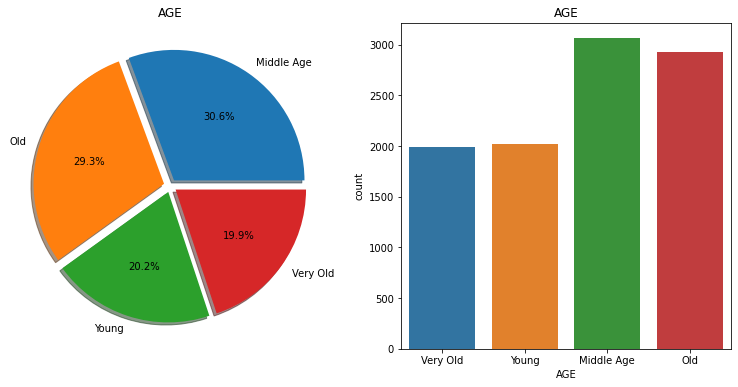

Middle Age    3063
Old           2931
Young         2016
Very Old      1990
Name: AGE, dtype: int64

In [ ]:
col='AGE'
f,ax=plt.subplots(1,2,figsize=(13,6))
df[col].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

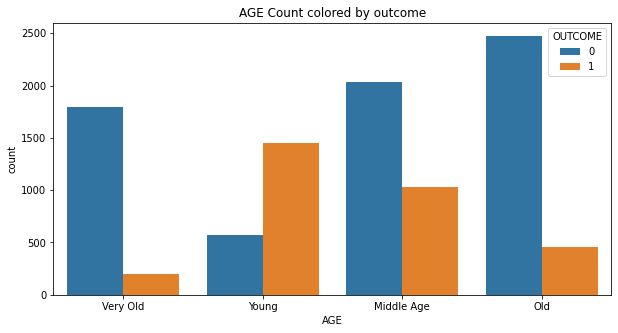

In [ ]:
# by classes
col='AGE'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x ='AGE', hue='OUTCOME')
plt.savefig(col+'_class.png')

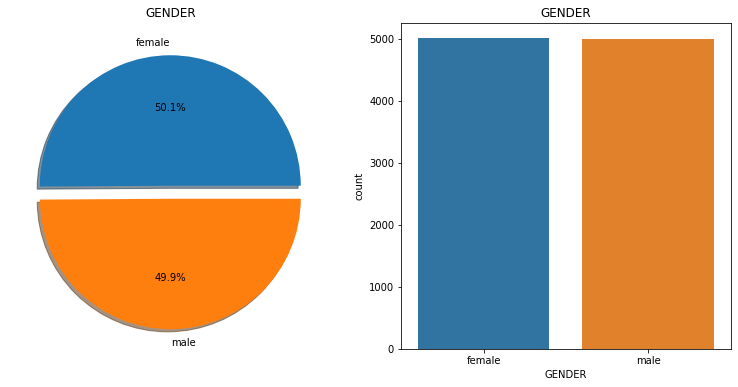

female    5010
male      4990
Name: GENDER, dtype: int64

In [ ]:
col='GENDER'
f,ax=plt.subplots(1,2,figsize=(13,6))
df[col].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

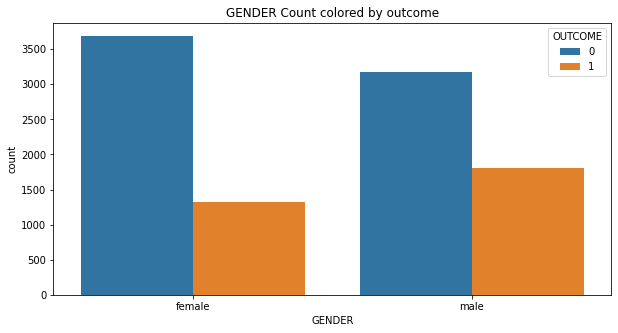

In [ ]:
# by classes
col='GENDER'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

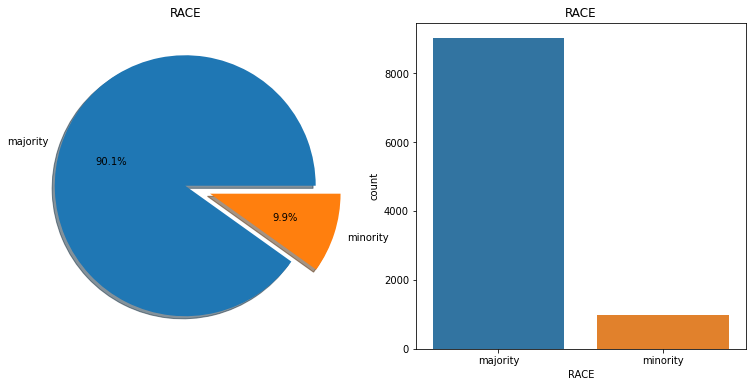

majority    9012
minority     988
Name: RACE, dtype: int64

In [ ]:
col='RACE'
f,ax=plt.subplots(1,2,figsize=(13,6))
df[col].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

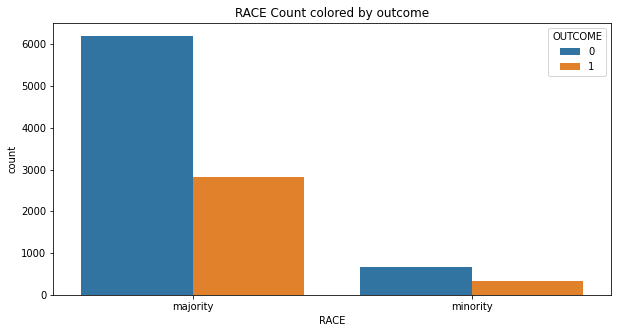

In [ ]:
# by classes
col='RACE'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

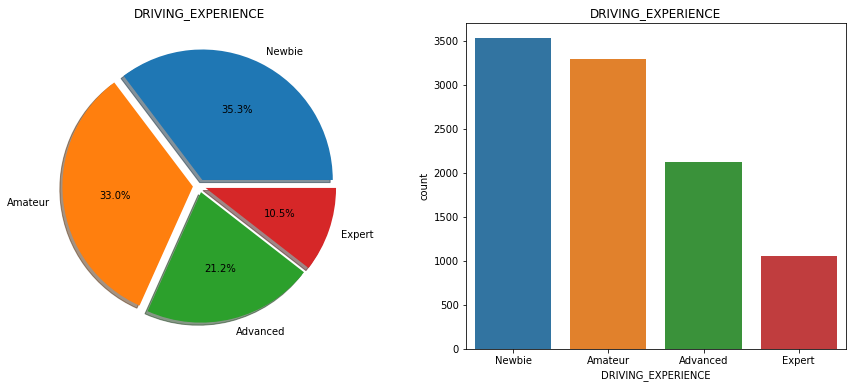

Newbie      3530
Amateur     3299
Advanced    2119
Expert      1052
Name: DRIVING_EXPERIENCE, dtype: int64

In [ ]:
col='DRIVING_EXPERIENCE'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

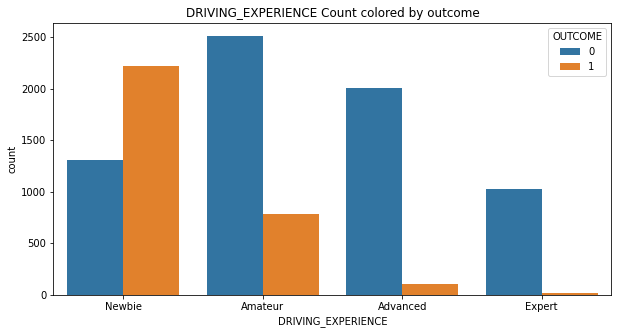

In [ ]:
# by classes
col='DRIVING_EXPERIENCE'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

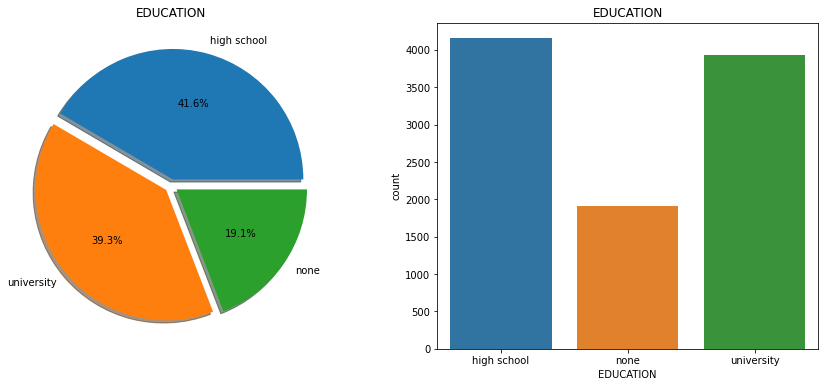

high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64

In [ ]:
col='EDUCATION'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

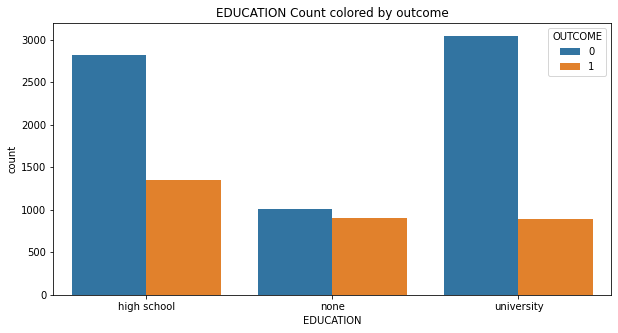

In [ ]:
# by classes
col='EDUCATION'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

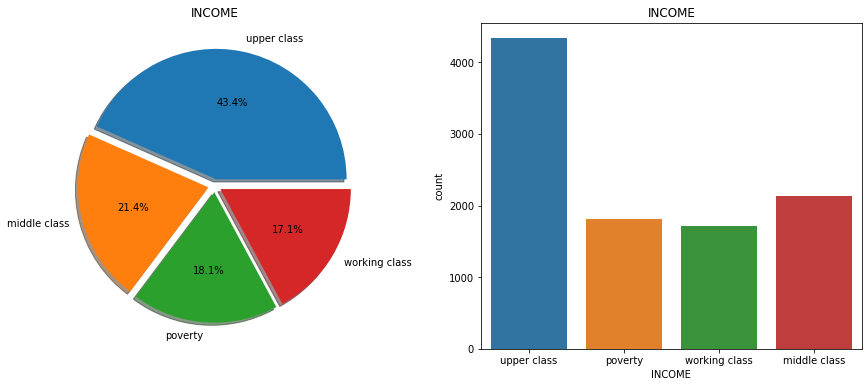

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

In [ ]:
col='INCOME'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

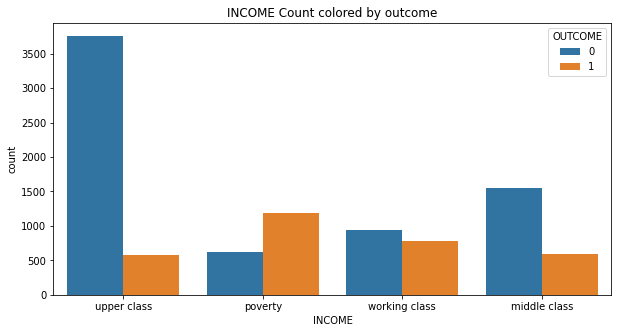

In [ ]:
# by classes
col='INCOME'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

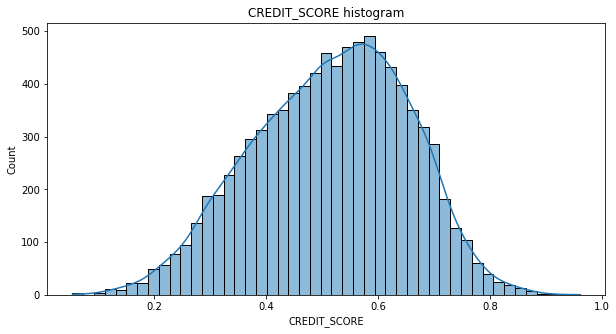

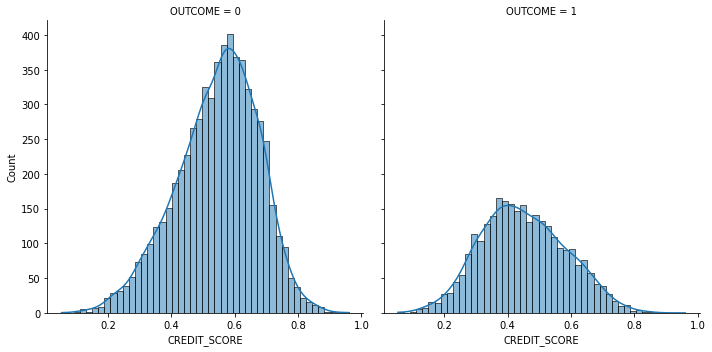

In [ ]:
col='CREDIT_SCORE'
plt.figure(figsize=(10,5))
plt.title(col+' histogram')
# sns.histplot(data=df, x='CREDIT_SCORE', hue='OUTCOME', kde=True);
sns.histplot(data=df, x=col, kde=True);
plt.savefig(col)
sns.displot(data=df, x=col, col="OUTCOME", kde=True)
plt.savefig(col+'_class.png')

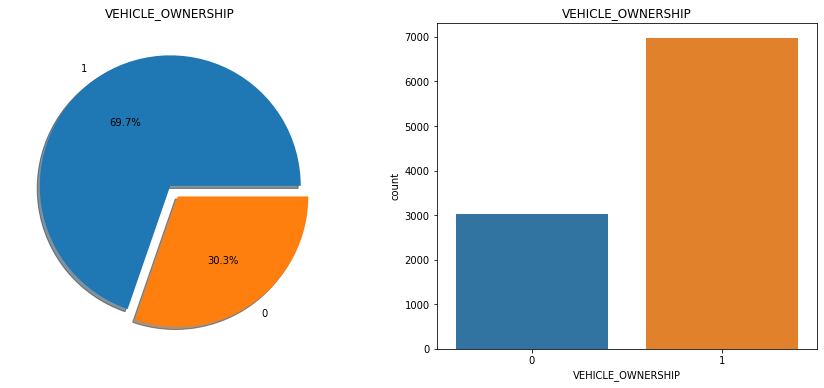

1    6970
0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [ ]:
col='VEHICLE_OWNERSHIP'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

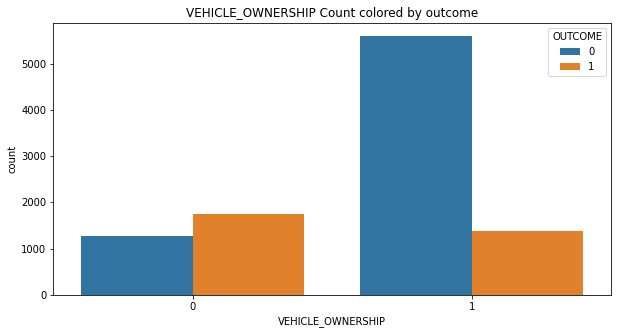

In [ ]:
# by classes
col='VEHICLE_OWNERSHIP'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

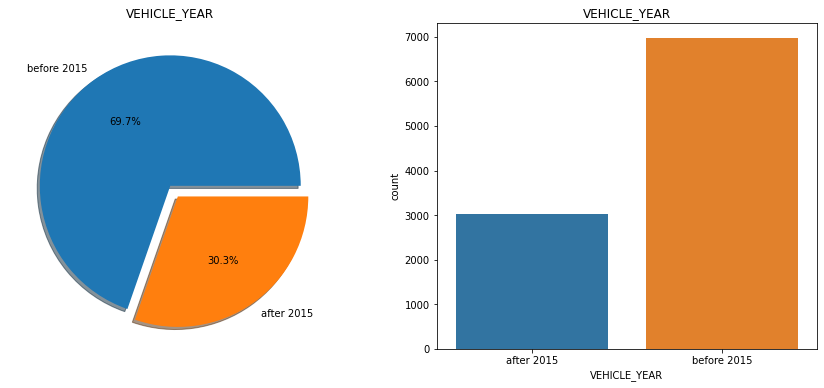

before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64

In [ ]:
col='VEHICLE_YEAR'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

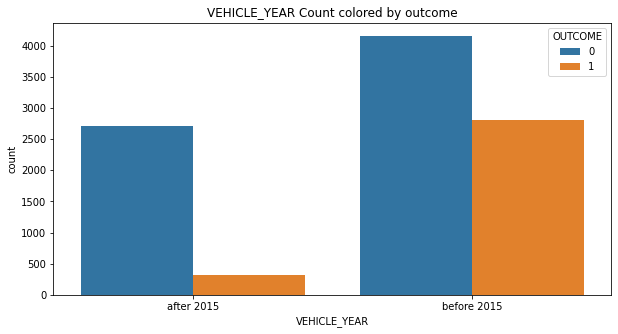

In [ ]:
# by classes
col='VEHICLE_YEAR'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

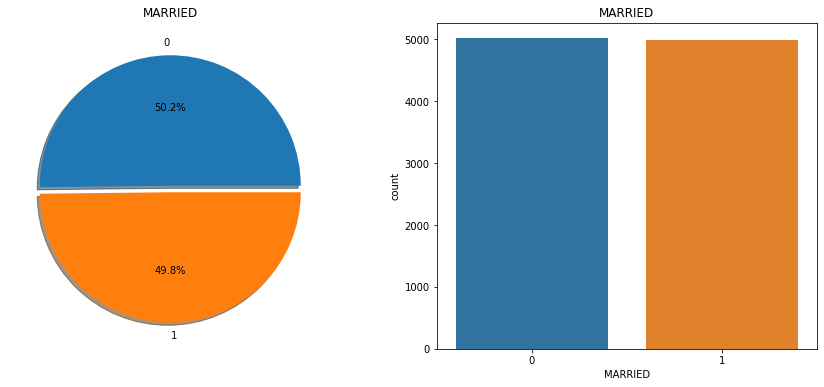

0    5018
1    4982
Name: MARRIED, dtype: int64

In [ ]:
col='MARRIED'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

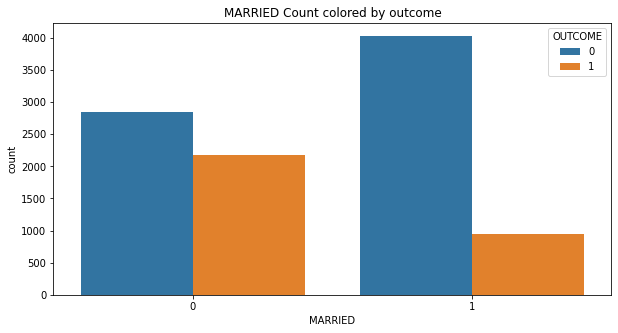

In [ ]:
# by classes
col='MARRIED'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

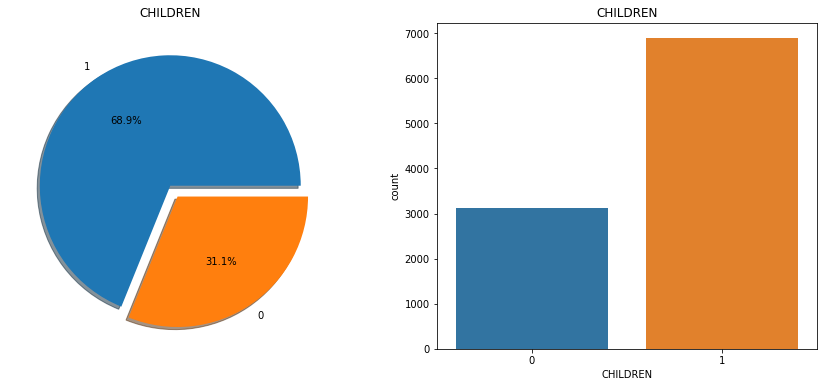

1    6888
0    3112
Name: CHILDREN, dtype: int64

In [ ]:
col='CHILDREN'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

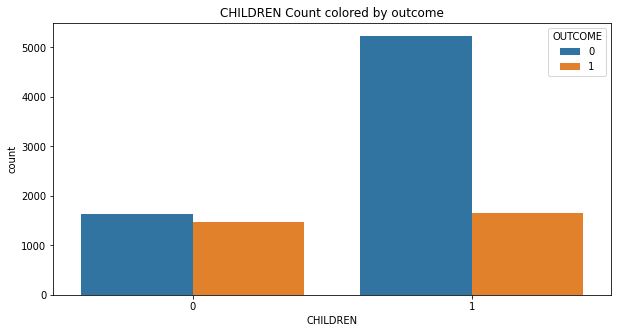

In [ ]:
# by classes
col='CHILDREN'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

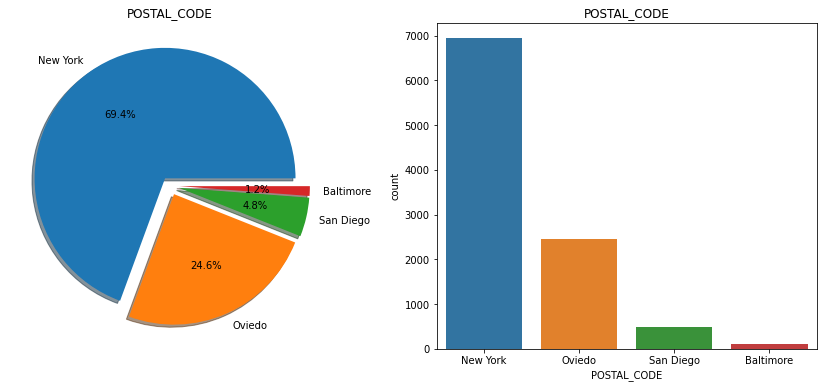

New York     6940
Oviedo       2456
San Diego     484
Baltimore     120
Name: POSTAL_CODE, dtype: int64

In [ ]:
col='POSTAL_CODE'
f,ax=plt.subplots(1,2,figsize=(15,6))
df[col].value_counts().plot.pie(explode=[0.07,0.07,0.07,0.07],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

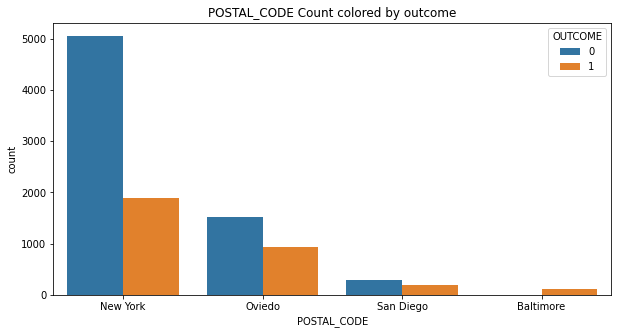

In [ ]:
# by classes
col='POSTAL_CODE'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

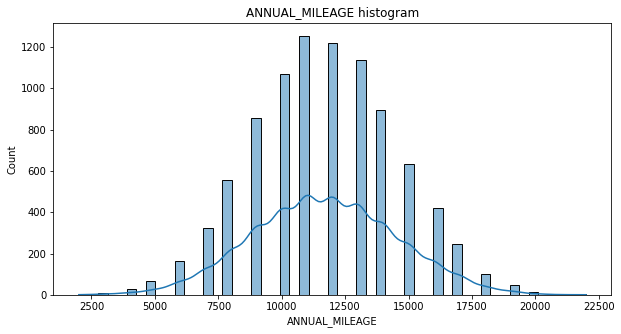

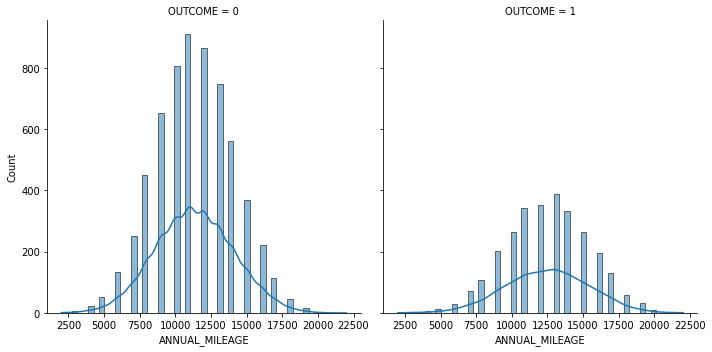

In [ ]:
col='ANNUAL_MILEAGE'
plt.figure(figsize=(10,5))
plt.title(col+' histogram')
# sns.histplot(data=df, x='CREDIT_SCORE', hue='OUTCOME', kde=True);
sns.histplot(data=df, x=col, kde=True);
plt.savefig(col)
sns.displot(data=df, x=col, col="OUTCOME", kde=True)
plt.savefig(col+'_class.png')

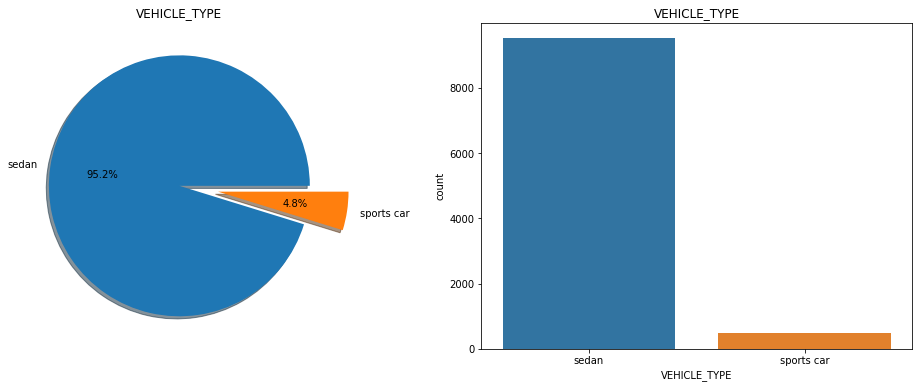

sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64

In [ ]:
col='VEHICLE_TYPE'
f,ax=plt.subplots(1,2,figsize=(17,6))
df[col].value_counts().plot.pie(explode=[0,0.3],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

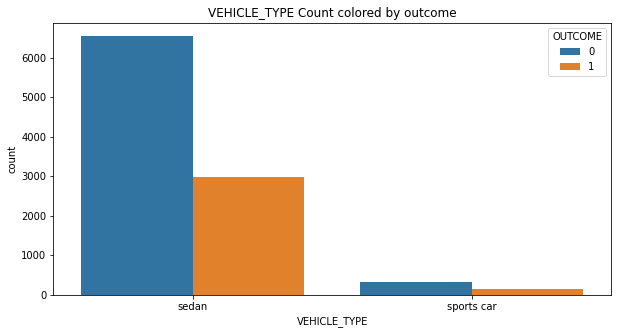

In [ ]:
# by classes
col='VEHICLE_TYPE'
plt.figure(figsize=(10,5))
plt.title(col+' Count colored by outcome')
fig = sns.countplot(data=df, x =col, hue='OUTCOME')
plt.savefig(col+'_class.png')

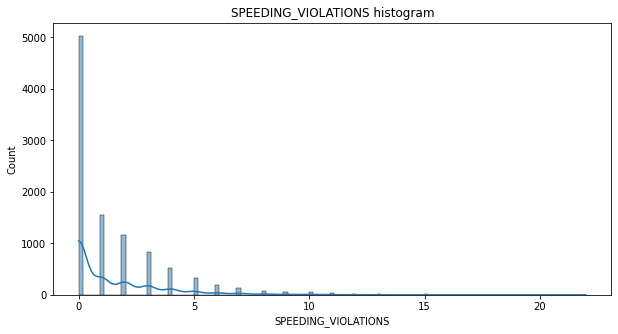

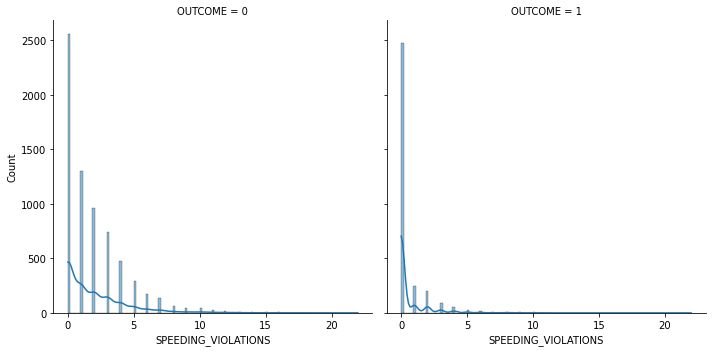

In [ ]:
col='SPEEDING_VIOLATIONS'
plt.figure(figsize=(10,5))
plt.title(col+' histogram')
# sns.histplot(data=df, x='CREDIT_SCORE', hue='OUTCOME', kde=True);
sns.histplot(data=df, x=col, kde=True);
plt.savefig(col)
sns.displot(data=df, x=col, col="OUTCOME", kde=True)
plt.savefig(col+'_class.png')

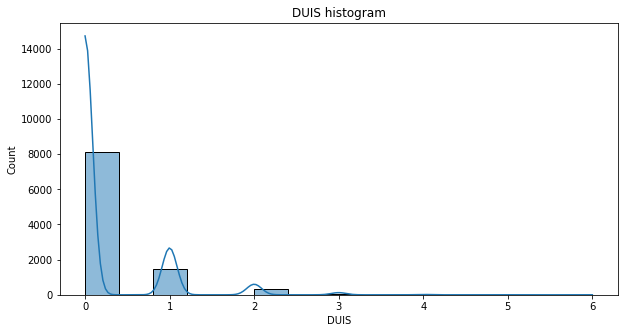

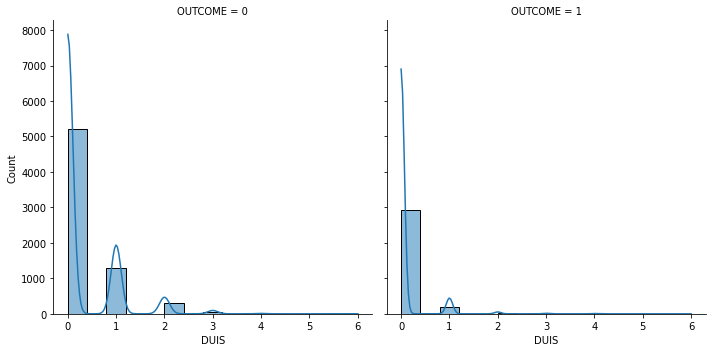

In [ ]:
col='DUIS'
plt.figure(figsize=(10,5))
plt.title(col+' histogram')
# sns.histplot(data=df, x='CREDIT_SCORE', hue='OUTCOME', kde=True);
sns.histplot(data=df, x=col, kde=True);
plt.savefig(col)
sns.displot(data=df, x=col, col="OUTCOME", kde=True)
plt.savefig(col+'_class.png')

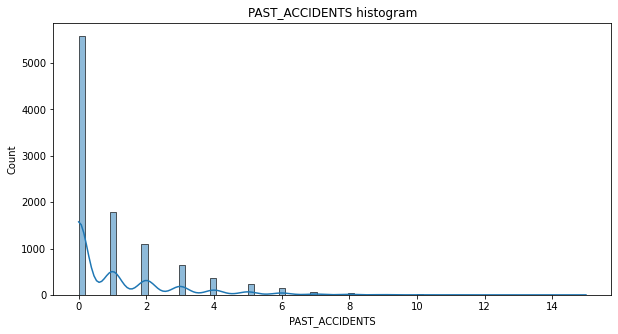

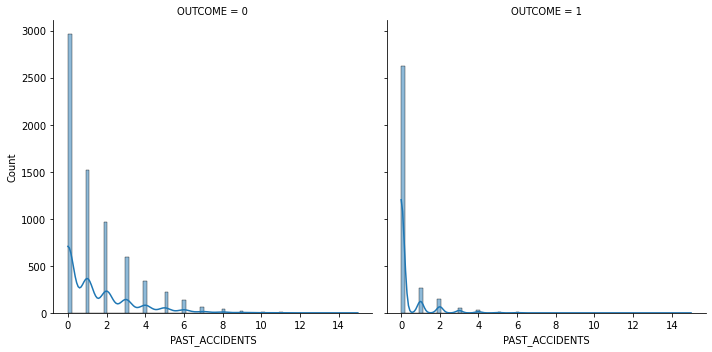

In [ ]:
col='PAST_ACCIDENTS'
plt.figure(figsize=(10,5))
plt.title(col+' histogram')
# sns.histplot(data=df, x='CREDIT_SCORE', hue='OUTCOME', kde=True);
sns.histplot(data=df, x=col, kde=True);
plt.savefig(col)
sns.displot(data=df, x=col, col="OUTCOME", kde=True)
plt.savefig(col+'_class.png')

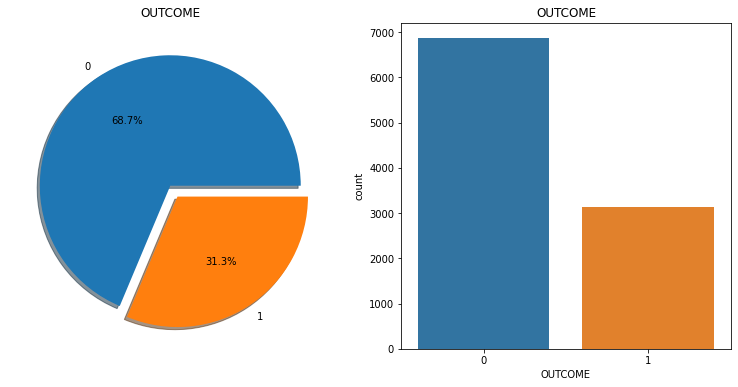

0    6867
1    3133
Name: OUTCOME, dtype: int64

In [ ]:
col='OUTCOME'
f,ax=plt.subplots(1,2,figsize=(13,6))
df[col].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df,ax=ax[1])
ax[1].set_title(col)
plt.savefig(col)
plt.show()
df[col].value_counts()

# 4- Data Preprocessing

In [ ]:
df_to_words = fn.to_words(df)

In [ ]:
df_to_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  object 
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [ ]:
df_to_words.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,Very Old,female,majority,Newbie,high school,upper class,0.629027,1,after 2015,0,1,New York,12000.0,sedan,0,0,0,0
1,Young,male,majority,Newbie,none,poverty,0.357757,0,before 2015,0,0,New York,16000.0,sedan,0,0,0,1
2,Young,female,majority,Newbie,high school,working class,0.493146,1,before 2015,0,0,New York,11000.0,sedan,0,0,0,0
3,Young,male,majority,Newbie,university,working class,0.206013,1,before 2015,0,1,Oviedo,11000.0,sedan,0,0,0,0
4,Middle Age,male,majority,Amateur,none,working class,0.388366,1,before 2015,0,0,Oviedo,12000.0,sedan,2,0,1,1


In [ ]:
df_to_words.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


# 4-1- Data Numericalization

In [ ]:
df_to_numerical = fn.to_numerical(df_to_words)

In [ ]:
df_to_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    10000 non-null  float64
 1   GENDER                 10000 non-null  int32  
 2   RACE                   10000 non-null  int32  
 3   DRIVING_EXPERIENCE     10000 non-null  float64
 4   EDUCATION              10000 non-null  float64
 5   INCOME                 10000 non-null  float64
 6   CREDIT_SCORE           9018 non-null   float64
 7   VEHICLE_OWNERSHIP      10000 non-null  int64  
 8   VEHICLE_YEAR           10000 non-null  int32  
 9   MARRIED                10000 non-null  int64  
 10  CHILDREN               10000 non-null  int64  
 11  ANNUAL_MILEAGE         9043 non-null   float64
 12  VEHICLE_TYPE           10000 non-null  int32  
 13  SPEEDING_VIOLATIONS    10000 non-null  int64  
 14  DUIS                   10000 non-null  int64  
 15  PAS

In [ ]:
df_to_numerical.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
0,0.970000,0,1,0.00000,0.5,1.000,0.629027,1,0,0,...,12000.0,1,0,0,0,0,1,0,0,0
1,0.000000,1,1,0.00000,0.0,0.000,0.357757,0,1,0,...,16000.0,1,0,0,0,1,1,0,0,0
2,0.000000,0,1,0.00000,0.5,0.333,0.493146,1,1,0,...,11000.0,1,0,0,0,0,1,0,0,0
3,0.000000,1,1,0.00000,1.0,0.333,0.206013,1,1,0,...,11000.0,1,0,0,0,0,0,1,0,0
4,0.190283,1,1,0.15493,0.0,0.333,0.388366,1,1,0,...,12000.0,1,2,0,1,1,0,1,0,0


In [ ]:
df_to_numerical.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,...,9043.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.399644,0.499000,0.901200,0.272663,0.600650,0.633000,0.515813,0.697000,0.696700,0.498200,...,11697.003207,0.952300,1.482900,0.23920,1.056300,0.313300,0.694000,0.245600,0.048400,0.012000
std,0.337182,0.500024,0.298408,0.307827,0.368725,0.383069,0.137688,0.459578,0.459707,0.500022,...,2818.434528,0.213141,2.241966,0.55499,1.652454,0.463858,0.460853,0.430464,0.214621,0.108891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,...,2000.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.190283,0.000000,1.000000,0.000000,0.500000,0.333000,0.417191,0.000000,0.000000,0.000000,...,10000.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.190283,0.000000,1.000000,0.154930,0.500000,0.666000,0.525033,1.000000,1.000000,0.000000,...,12000.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.506073,1.000000,1.000000,0.598734,1.000000,1.000000,0.618312,1.000000,1.000000,1.000000,...,14000.000000,1.000000,2.000000,0.00000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.970000,1.000000,1.000000,0.900000,1.000000,1.000000,0.960819,1.000000,1.000000,1.000000,...,22000.000000,1.000000,22.000000,6.00000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Correlation with the response variable'}>

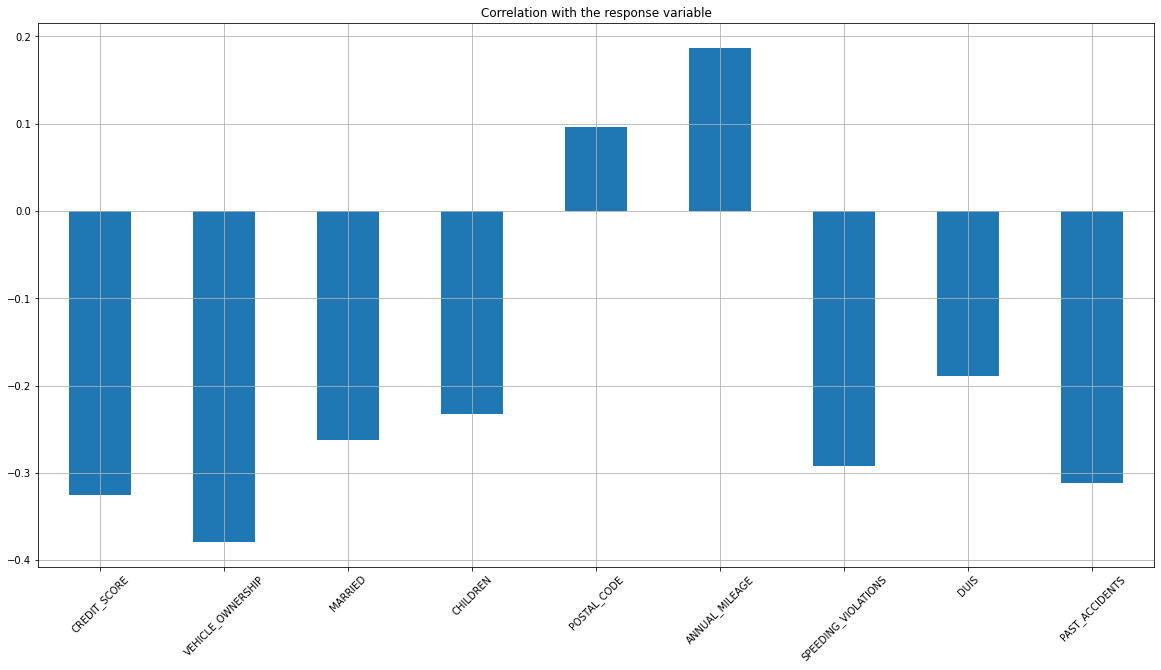

In [ ]:
# Correlation features with response variable after numericalization
df.drop(columns = ['OUTCOME']).corrwith(df.OUTCOME).plot.bar(figsize = (20,10),
                                                             grid = True, rot = 45,
                                                             title='Correlation with the response variable')

## 4-3- Outlier treatment

### 4-3-1- Outlier Visualization

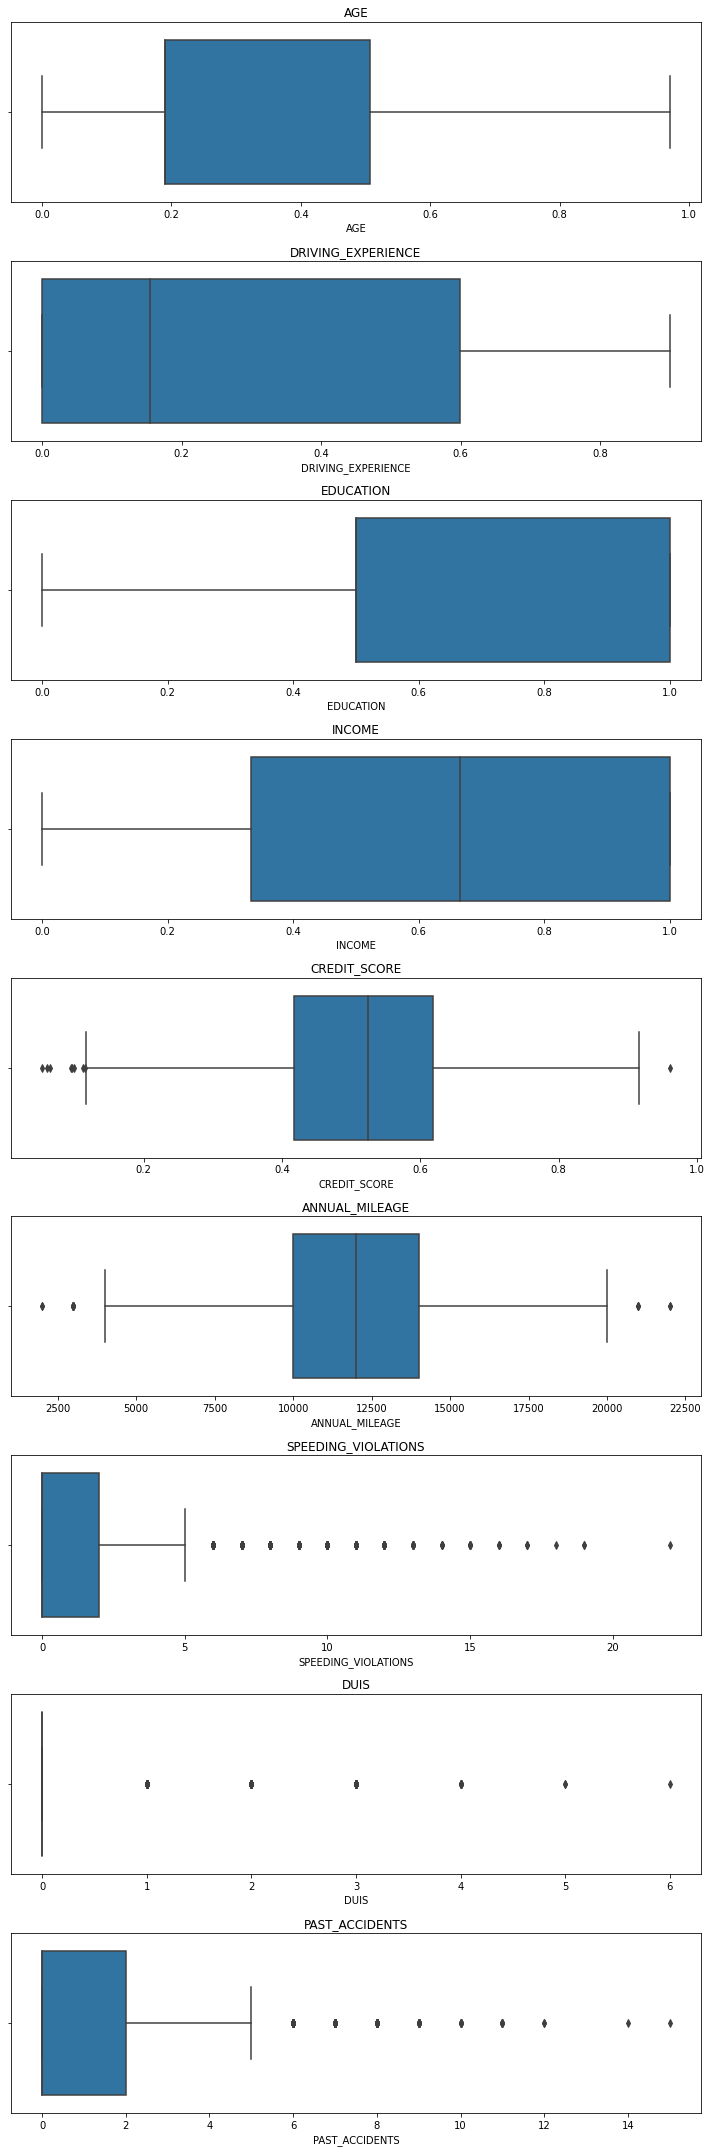

In [ ]:
f, axes = plt.subplots(9, 1, figsize=(10, 30))
for (index, column) in enumerate(['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']):
    sns.boxplot(data=df_to_numerical, x=column, ax=axes[index])
    axes[index].set_title(column)
f.tight_layout()

### 4-3-2- Outlier detection and removing using iqr

In [ ]:
oulier_indices_iqr = fn.detect_outlier_iqr(df_to_numerical)

Number of outlier in each column:
RACE :  988
CREDIT_SCORE :  9
ANNUAL_MILEAGE :  17
VEHICLE_TYPE :  477
SPEEDING_VIOLATIONS :  588
DUIS :  1882
PAST_ACCIDENTS :  285
POSTAL_CODE_Oviedo :  2456
POSTAL_CODE_San_Diego :  484
POSTAL_CODE_Baltimore :  120


In [ ]:
columns_to_remove = ['CREDIT_SCORE','ANNUAL_MILEAGE']
df_remove_outlier_iqr =fn.remove_outlier(df_to_numerical,oulier_indices_iqr,columns_to_remove)

In [ ]:
df_remove_outlier_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    9974 non-null   float64
 1   GENDER                 9974 non-null   int32  
 2   RACE                   9974 non-null   int32  
 3   DRIVING_EXPERIENCE     9974 non-null   float64
 4   EDUCATION              9974 non-null   float64
 5   INCOME                 9974 non-null   float64
 6   CREDIT_SCORE           8993 non-null   float64
 7   VEHICLE_OWNERSHIP      9974 non-null   int64  
 8   VEHICLE_YEAR           9974 non-null   int32  
 9   MARRIED                9974 non-null   int64  
 10  CHILDREN               9974 non-null   int64  
 11  ANNUAL_MILEAGE         9017 non-null   float64
 12  VEHICLE_TYPE           9974 non-null   int32  
 13  SPEEDING_VIOLATIONS    9974 non-null   int64  
 14  DUIS                   9974 non-null   int64  
 15  PAST

In [ ]:
df_remove_outlier_iqr.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
0,0.970000,0,1,0.00000,0.5,1.000,0.629027,1,0,0,...,12000.0,1,0,0,0,0,1,0,0,0
1,0.000000,1,1,0.00000,0.0,0.000,0.357757,0,1,0,...,16000.0,1,0,0,0,1,1,0,0,0
2,0.000000,0,1,0.00000,0.5,0.333,0.493146,1,1,0,...,11000.0,1,0,0,0,0,1,0,0,0
3,0.000000,1,1,0.00000,1.0,0.333,0.206013,1,1,0,...,11000.0,1,0,0,0,0,0,1,0,0
4,0.190283,1,1,0.15493,0.0,0.333,0.388366,1,1,0,...,12000.0,1,2,0,1,1,0,1,0,0


In [ ]:
df_remove_outlier_iqr.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
count,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,8993.000000,9974.000000,9974.000000,9974.000000,...,9017.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,0.399812,0.498797,0.901143,0.272770,0.600862,0.633448,0.516112,0.697213,0.696411,0.498296,...,11701.674615,0.952176,1.480249,0.239623,1.057149,0.312713,0.694405,0.245137,0.048426,0.012031
std,0.337112,0.500024,0.298485,0.307796,0.368606,0.382738,0.137118,0.459487,0.459830,0.500022,...,2792.901715,0.213405,2.234422,0.555485,1.653640,0.463622,0.460682,0.430190,0.214675,0.109031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116264,0.000000,0.000000,0.000000,...,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.190283,0.000000,1.000000,0.000000,0.500000,0.333000,0.417468,0.000000,0.000000,0.000000,...,10000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.190283,0.000000,1.000000,0.154930,0.500000,0.666000,0.525150,1.000000,1.000000,0.000000,...,12000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.506073,1.000000,1.000000,0.598734,1.000000,1.000000,0.618378,1.000000,1.000000,1.000000,...,14000.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.970000,1.000000,1.000000,0.900000,1.000000,1.000000,0.915883,1.000000,1.000000,1.000000,...,20000.000000,1.000000,22.000000,6.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4-3-3- Outlier detection and removing using zscore

In [ ]:
oulier_indices_zscore = fn.detect_outlier_zscore(df_to_numerical)

Number of outlier in each column:
RACE :  988
CREDIT_SCORE :  7
ANNUAL_MILEAGE :  17
VEHICLE_TYPE :  477
SPEEDING_VIOLATIONS :  185
DUIS :  412
PAST_ACCIDENTS :  141
POSTAL_CODE_San_Diego :  484
POSTAL_CODE_Baltimore :  120


In [ ]:
columns_to_remove = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']
df_remove_outlier_zscore =fn.remove_outlier(df_to_numerical,oulier_indices_zscore,columns_to_remove)

In [ ]:
df_remove_outlier_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    9976 non-null   float64
 1   GENDER                 9976 non-null   int32  
 2   RACE                   9976 non-null   int32  
 3   DRIVING_EXPERIENCE     9976 non-null   float64
 4   EDUCATION              9976 non-null   float64
 5   INCOME                 9976 non-null   float64
 6   CREDIT_SCORE           8995 non-null   float64
 7   VEHICLE_OWNERSHIP      9976 non-null   int64  
 8   VEHICLE_YEAR           9976 non-null   int32  
 9   MARRIED                9976 non-null   int64  
 10  CHILDREN               9976 non-null   int64  
 11  ANNUAL_MILEAGE         9019 non-null   float64
 12  VEHICLE_TYPE           9976 non-null   int32  
 13  SPEEDING_VIOLATIONS    9976 non-null   int64  
 14  DUIS                   9976 non-null   int64  
 15  PAST

In [ ]:
df_remove_outlier_zscore.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
0,0.970000,0,1,0.00000,0.5,1.000,0.629027,1,0,0,...,12000.0,1,0,0,0,0,1,0,0,0
1,0.000000,1,1,0.00000,0.0,0.000,0.357757,0,1,0,...,16000.0,1,0,0,0,1,1,0,0,0
2,0.000000,0,1,0.00000,0.5,0.333,0.493146,1,1,0,...,11000.0,1,0,0,0,0,1,0,0,0
3,0.000000,1,1,0.00000,1.0,0.333,0.206013,1,1,0,...,11000.0,1,0,0,0,0,0,1,0,0
4,0.190283,1,1,0.15493,0.0,0.333,0.388366,1,1,0,...,12000.0,1,2,0,1,1,0,1,0,0


In [ ]:
df_remove_outlier_zscore.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
count,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,8995.000000,9976.000000,9976.000000,9976.000000,...,9019.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000
mean,0.399783,0.498797,0.901063,0.272775,0.600792,0.633321,0.516023,0.697173,0.696472,0.498196,...,11702.627786,0.952185,1.480152,0.239575,1.056937,0.312751,0.694366,0.245188,0.048416,0.012029
std,0.337103,0.500024,0.298593,0.307794,0.368619,0.382805,0.137233,0.459504,0.459804,0.500022,...,2793.325372,0.213385,2.234253,0.555439,1.653542,0.463637,0.460698,0.430220,0.214655,0.109020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112631,0.000000,0.000000,0.000000,...,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.190283,0.000000,1.000000,0.000000,0.500000,0.333000,0.417421,0.000000,0.000000,0.000000,...,10000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.190283,0.000000,1.000000,0.154930,0.500000,0.666000,0.525086,1.000000,1.000000,0.000000,...,12000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.506073,1.000000,1.000000,0.598734,1.000000,1.000000,0.618346,1.000000,1.000000,1.000000,...,14000.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.970000,1.000000,1.000000,0.900000,1.000000,1.000000,0.915883,1.000000,1.000000,1.000000,...,20000.000000,1.000000,22.000000,6.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4-3-4- Outlier detection and removing using knn

In [ ]:
df_filling_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    9974 non-null   float64
 1   GENDER                 9974 non-null   float64
 2   RACE                   9974 non-null   float64
 3   DRIVING_EXPERIENCE     9974 non-null   float64
 4   EDUCATION              9974 non-null   float64
 5   INCOME                 9974 non-null   float64
 6   CREDIT_SCORE           9974 non-null   float64
 7   VEHICLE_OWNERSHIP      9974 non-null   float64
 8   VEHICLE_YEAR           9974 non-null   float64
 9   MARRIED                9974 non-null   float64
 10  CHILDREN               9974 non-null   float64
 11  ANNUAL_MILEAGE         9974 non-null   float64
 12  VEHICLE_TYPE           9974 non-null   float64
 13  SPEEDING_VIOLATIONS    9974 non-null   float64
 14  DUIS                   9974 non-null   float64
 15  PAST

In [ ]:
df_filling_miss.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
0,0.970000,0.0,1.0,0.00000,0.5,1.000,0.629027,1.0,0.0,0.0,...,0.5000,1.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.000000,1.0,1.0,0.00000,0.0,0.000,0.357757,0.0,1.0,0.0,...,0.7500,1.0,0.000000,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
2,0.000000,0.0,1.0,0.00000,0.5,0.333,0.493146,1.0,1.0,0.0,...,0.4375,1.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
3,0.000000,1.0,1.0,0.00000,1.0,0.333,0.206013,1.0,1.0,0.0,...,0.4375,1.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.190283,1.0,1.0,0.15493,0.0,0.333,0.388366,1.0,1.0,0.0,...,0.5000,1.0,0.090909,0.0,0.066667,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_filling_miss.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,POSTAL_CODE_New_York,POSTAL_CODE_Oviedo,POSTAL_CODE_San_Diego,POSTAL_CODE_Baltimore
count,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,...,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,0.399812,0.498797,0.901143,0.272770,0.600862,0.633448,0.515548,0.697213,0.696411,0.498296,...,0.480985,0.952176,0.067284,0.039937,0.070477,0.312713,0.694405,0.245137,0.048426,0.012031
std,0.337112,0.500024,0.298485,0.307796,0.368606,0.382738,0.134186,0.459487,0.459830,0.500022,...,0.169794,0.213405,0.101565,0.092581,0.110243,0.463622,0.460682,0.430190,0.214675,0.109031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116264,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.190283,0.000000,1.000000,0.000000,0.500000,0.333000,0.418682,0.000000,0.000000,0.000000,...,0.375000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.190283,0.000000,1.000000,0.154930,0.500000,0.666000,0.526502,1.000000,1.000000,0.000000,...,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.506073,1.000000,1.000000,0.598734,1.000000,1.000000,0.616264,1.000000,1.000000,1.000000,...,0.625000,1.000000,0.090909,0.000000,0.133333,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.970000,1.000000,1.000000,0.900000,1.000000,1.000000,0.915883,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_remove_outlier =df_remove_outlier_iqr.copy()

## 4-4- Data Normalization

In [ ]:
cols_to_norm = ['ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

### 4-4-1- Normalization using Min-Max

In [ ]:
df_to_normal_minmax = fn.to_normal_minmax(df_remove_outlier,cols_to_norm)

<AxesSubplot:title={'center':'Correlation with the response variable'}>

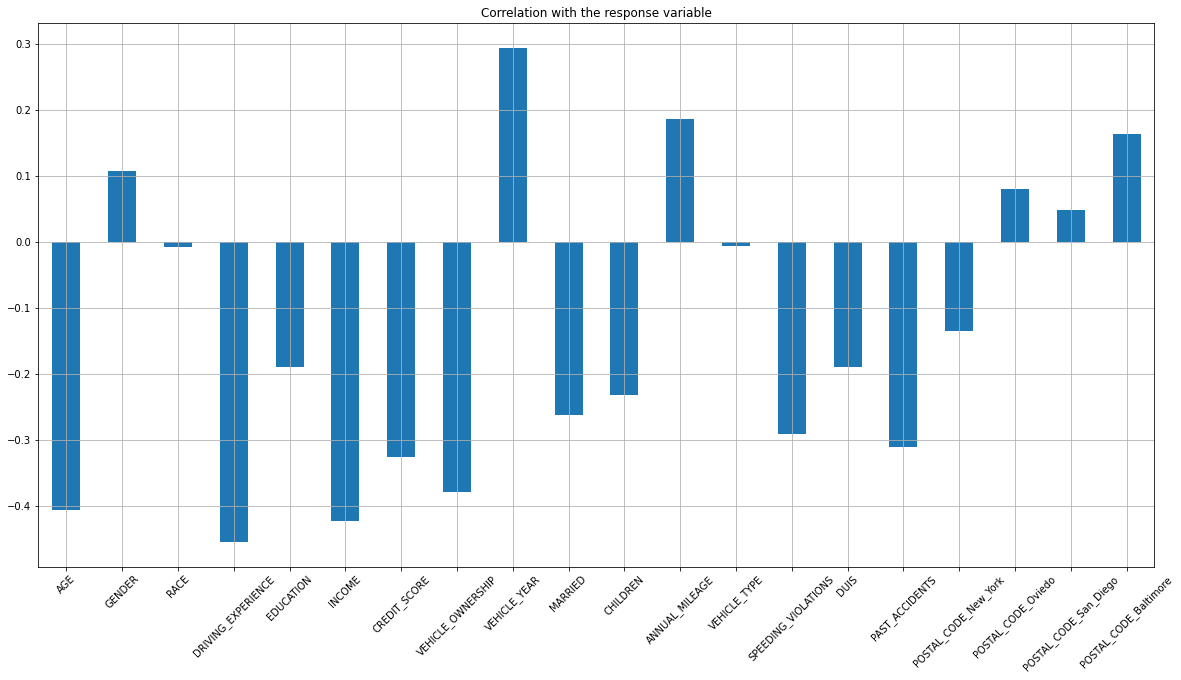

In [ ]:
# Correlation features with response variable after Normalization using Min-Max
df_to_normal_minmax.drop(columns = ['OUTCOME']).corrwith(df_to_normal_minmax.OUTCOME).plot.bar(figsize = (20,10), grid = True, rot = 45, title='Correlation with the response variable')

### 4-4-2- Normalization using ZScore

In [ ]:
df_to_normal_zscore = fn.to_normal_zscore(df_remove_outlier,cols_to_norm)

<AxesSubplot:title={'center':'Correlation with the response variable'}>

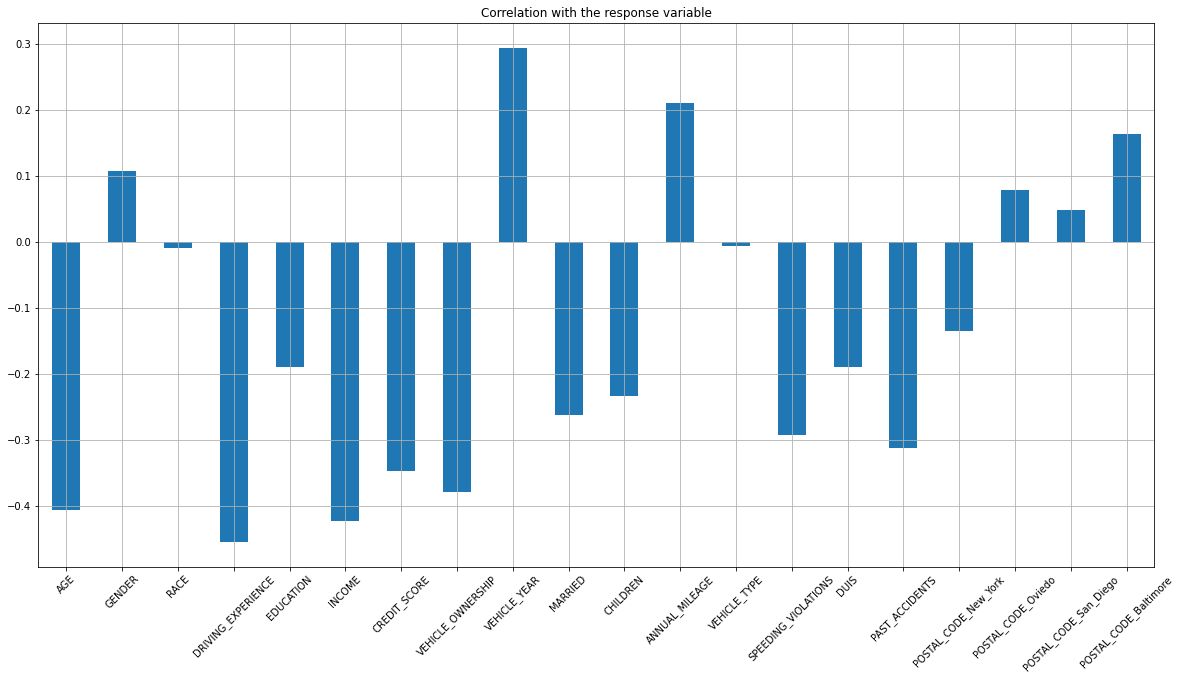

In [ ]:
# Correlation features with response variable after Normalization using ZSCORE
df.drop(columns = ['OUTCOME']).corrwith(df.OUTCOME).plot.bar(figsize = (20,10), grid = True, rot = 45, title='Correlation with the response variable')

In [ ]:
df_to_normal = df_to_normal_minmax.copy()

## 4-5- Missing value treatment

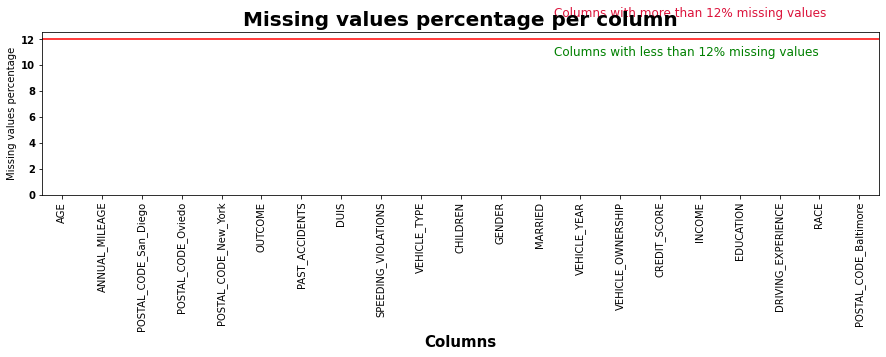

In [ ]:
fn.plot_missing(df, 12, color = 'green', edgecolor = 'black', height = 3, width = 15)

### Create 10% missing values

In [ ]:
df_miss = fn.create_miss(df_to_normal_minmax,df_to_normal_minmax.columns.tolist(),0.1)

In [ ]:
df_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    8974 non-null   float64
 1   GENDER                 8974 non-null   float64
 2   RACE                   8974 non-null   float64
 3   DRIVING_EXPERIENCE     8974 non-null   float64
 4   EDUCATION              8974 non-null   float64
 5   INCOME                 8974 non-null   float64
 6   CREDIT_SCORE           8100 non-null   float64
 7   VEHICLE_OWNERSHIP      8974 non-null   float64
 8   VEHICLE_YEAR           8974 non-null   float64
 9   MARRIED                8974 non-null   float64
 10  CHILDREN               8974 non-null   float64
 11  ANNUAL_MILEAGE         8120 non-null   float64
 12  VEHICLE_TYPE           8974 non-null   float64
 13  SPEEDING_VIOLATIONS    8974 non-null   float64
 14  DUIS                   8974 non-null   float64
 15  PAST

### 4-5-1- Filling missing values with KNN

In [ ]:
df_filling_miss_knn = fn.filling_miss_knn(df_miss,5,df_miss.columns)

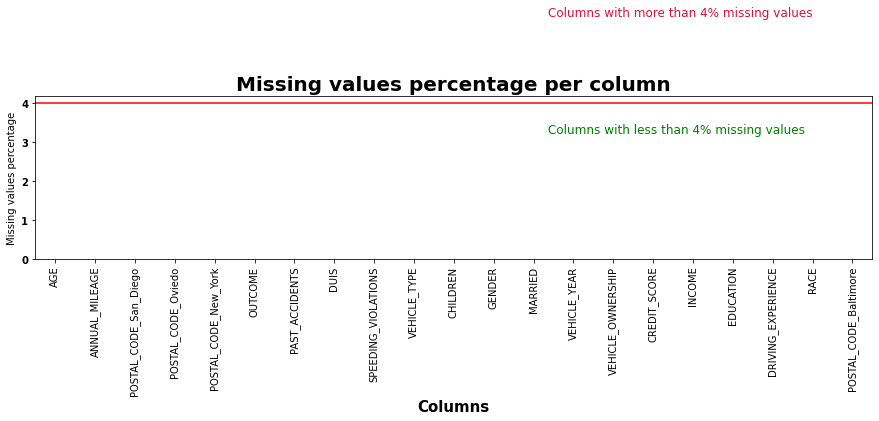

In [ ]:
plot_missing(df_filling_miss_knn, 4, color = 'green', edgecolor = 'black', height = 3, width = 15)

### 4-5-2- Filling missing values with Iterative

In [ ]:
df_filling_miss_iterative = fn.filling_miss_iterative(df_miss,max_iteration=100,columns=df_to_normal_minmax.columns)

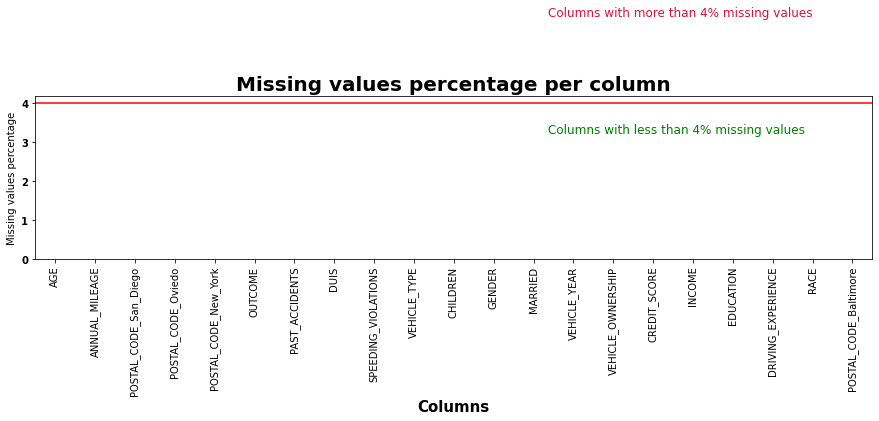

In [ ]:
plot_missing(df_filling_miss_iterative, 4, color = 'green', edgecolor = 'black', height = 3, width = 15)

### 4-5-3- Filling missing values with median by class

In [ ]:
df_filling_miss_median = fn.filling_miss_median(df_to_normal_minmax,['CREDIT_SCORE','ANNUAL_MILEAGE'])

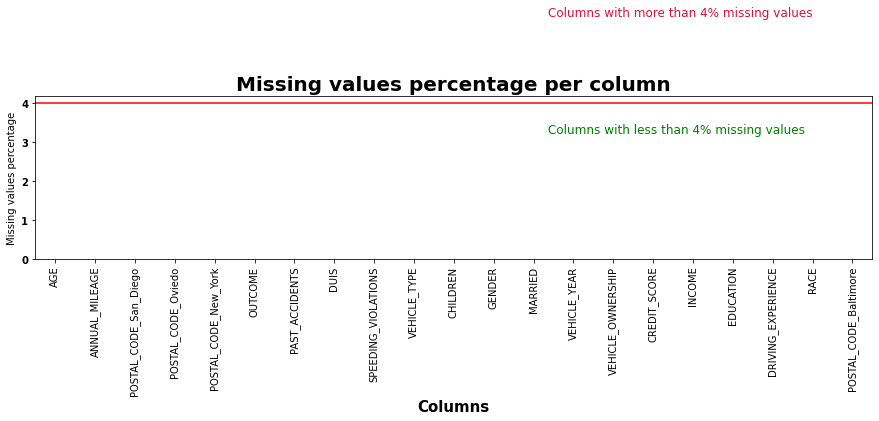

In [ ]:
plot_missing(df_filling_miss_median, 4, color = 'green', edgecolor = 'black', height = 3, width = 15)

### 4-5-3- RMSE metrics

In [ ]:
sum_rmse=0
for col in df.columns.tolist():
    sum_rmse+=fn.rmse(df_base,col,df_fill_with_knn,col)
print('rmse for fill with knn = ',sum_rmse)
sum_iter=0
for col in df.columns.tolist():
    sum_iter+=fn.rmse(df_base,col,df_fill_with_iter,col)
print('rmse for fill with Iterative = ',sum_iter)

rmse for fill with knn =  1.5706676368550654
rmse for fill with Iterative =  1.3365481464141478


#### --------> filling with iterative method has low RMSE so is better method

In [ ]:
df_filling_miss = fn.filling_miss_iterative(df_to_normal,max_iteration=100,columns=df_to_normal_minmax.columns)

# 5- Modeling

In [ ]:
x_train, x_test, y_train, y_test = fn.split_before_balance(df_filling_miss,'undersampling',split_size = 0.3)

In [ ]:
print(f"Train:{Counter(y_train)}\nTest:{Counter(y_test)}")

Train:Counter({0.0: 2198, 1.0: 2198})
Test:Counter({0.0: 2072, 1.0: 921})


## 5-1- Dicision Tree

In [ ]:
measures_dt = ['recall','accuracy']

In [ ]:
random_params_dt = [{
'criterion':['gini','entropy','log_loss'],
'max_depth':list(range(3,12)),
'min_samples_split':list(range(130,250,2)),
'random_state':[20]}
]

In [ ]:
grid_params_dt = [{
'criterion':['gini','entropy','log_loss'],
'max_depth':list(range(1,25)),
'min_samples_split':list(range(2,500,10)),
'random_state':[20]}
]

In [ ]:
start_time=time.time()
best_grid = fn.grid_search(x_train,y_train,DecisionTreeClassifier(),grid_params_dt,measures_dt,cv_num=10)
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


644 sec


In [ ]:
best_grid

{'measures': {'recall': 85.3, 'accuracy': 83.1},
 'params': {'recall': {'criterion': 'gini',
   'max_depth': 3,
   'min_samples_split': 130,
   'random_state': 20},
  'accuracy': {'criterion': 'gini',
   'max_depth': 3,
   'min_samples_split': 130,
   'random_state': 20}}}

In [ ]:
best_recall, repeat, base_measure = 0, 10, 'recall'
for i in range(repeat):
    best = fn.random_search(x_train,y_train,DecisionTreeClassifier(),random_params_dt,measures_dt,
                            cv_num=10, iteration=10)
    print(f"\ntry {i:<5}",end='')
    if best['measures']['recall'] > best_recall:
        best_recall = best['measures']['recall']
        best_random_dt = best
        print(f"Recall: {best_recall:<10}"
              f"Parameters: {best['params'][base_measure]['criterion']:<11}"
              f"{best['params'][base_measure]['max_depth']:<5}"
              f"{best['params'][base_measure]['min_samples_split']:<5}",end=''
             )


try 0    Recall: 84.39     Parameters: log_loss   11   214  
try 1    Recall: 85.3      Parameters: gini       6    214  
try 2    Recall: 85.35     Parameters: gini       11   214  
try 3    
try 4    
try 5    
try 6    
try 7    
try 8    
try 9    

In [ ]:
best_random_dt

{'measures': {'recall': 85.35, 'accuracy': 84.19},
 'params': {'recall': {'random_state': 20,
   'min_samples_split': 214,
   'max_depth': 11,
   'criterion': 'gini'},
  'accuracy': {'random_state': 20,
   'min_samples_split': 144,
   'max_depth': 7,
   'criterion': 'entropy'}}}

In [ ]:
dt_measures = fn.dt(x_train,y_train,x_test,y_test,
                    'gini',max_depth=11,min_split=214,
                    scoring_measures=measures_dt)

In [ ]:
dt_measures

{'train': {'recall': 84.39, 'accuracy': 84.28},
 'test': {'recall': 84.8, 'accuracy': 83.83}}

In [ ]:
dt_measures

{'train': {'recall': 84.39, 'accuracy': 84.28},
 'test': {'recall': 84.8, 'accuracy': 83.83}}

In [ ]:
start_time=time.time()

difference, condition, measure = fn.min_overfit_dt(x_train,y_train,x_test,y_test,
                                                   random_params_dt, measures_dt,
                                                   cv=5,iter=5,repeat=30)

end_time=time.time()
print(end_time-start_time)

0	recall: 85.88     overfite: 0.580     parameters: gini, 3, 202
1	recall: 82.63     overfite: 0.460     parameters: log_loss, 9, 192
2	recall: 82.74     overfite: 0.390     parameters: gini, 6, 196
9	recall: 84.04     overfite: 0.350     parameters: log_loss, 5, 176
15	recall: 84.58     overfite: 0.180     parameters: log_loss, 3, 240
18.4113986492157


In [ ]:
difference, condition, measure

(0.18000000000000682,
 {'random_state': 20,
  'min_samples_split': 240,
  'max_depth': 3,
  'criterion': 'log_loss'},
 {'train': 84.76, 'test': 84.58})

In [ ]:

fn.dt(x_train,y_train,x_test,y_test,'log_loss',
      max_depth = 3,min_split = 240,
      scoring_measures = measures_dt)


{'train': {'recall': 84.76, 'accuracy': 82.83},
 'test': {'recall': 84.58, 'accuracy': 81.72}}

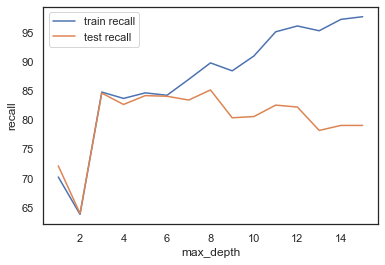

,max_depth,Train,Test,Difference
0,1,70.20,72.10,-1.90
1,2,63.79,63.95,-0.16
2,3,84.76,84.58,0.18
3,4,83.67,82.63,1.04
4,5,84.62,84.15,0.47
5,6,84.21,84.04,0.17
6,7,86.94,83.39,3.55
7,8,89.76,85.12,4.64
8,9,88.40,80.35,8.05
9,10,90.95,80.56,10.39


In [ ]:

train, test, min, max, step, measure, variable = [], [], 1, 15, 1, 'recall', 'max_depth'
for max_depth in range(min, max+1, step):
    min_split = 2
    dt_measures = fn.dt(x_train,y_train,x_test,y_test,'log_loss',max_depth,min_split,[measure])
    train.append(dt_measures['train'][measure])
    test.append(dt_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
print(table)


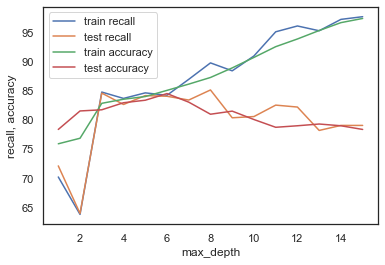

    max_depth  Train_recall  Test_recall  Train_accuracy  Test_accuracy  \
0           1         70.20        72.10           75.89          78.35   
1           2         63.79        63.95           76.84          81.52   
2           3         84.76        84.58           82.83          81.72   
3           4         83.67        82.63           83.53          82.93   
4           5         84.62        84.15           83.99          83.36   
5           6         84.21        84.04           85.05          84.50   
6           7         86.94        83.39           86.12          83.03   
7           8         89.76        85.12           87.26          80.96   
8           9         88.40        80.35           88.90          81.49   
9          10         90.95        80.56           90.70          80.05   
10         11         95.09        82.52           92.54          78.72   
11         12         96.09        82.19           93.86          78.98   
12         13         95.

In [ ]:

train1, test1, train2, test2, min, max, step, measure1,measure2, variable =\
[], [], [], [], 1, 15, 1, 'recall', 'accuracy', 'max_depth'
for max_depth in range(min,max+1, step):
    min_split = 2
    dt_measures = fn.dt(x_train,y_train,x_test,y_test,'log_loss',
                        max_depth,min_split,[measure1,measure2])
    train1.append(dt_measures['train'][measure1])
    test1.append(dt_measures['test'][measure1])
    train2.append(dt_measures['train'][measure2])
    test2.append(dt_measures['test'][measure2])
plt,table = fn.change_plot2(variable,min,max,step,train1,test1,
                            measure1, train2,test2,measure2)
plt.show()
print(table)


In [ ]:
dt_measures = fn.dt(x_train,y_train,x_test,y_test,'log_loss',max_depth=3,min_split=2,scoring_measures=measures_dt)

In [ ]:
dt_measures

{'train': {'recall': 84.76, 'accuracy': 82.83},
 'test': {'recall': 84.58, 'accuracy': 81.72}}

--------- Result for Decision Tree on test data ---------

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      2072
         1.0       0.66      0.85      0.74       921

    accuracy                           0.82      2993
   macro avg       0.79      0.83      0.80      2993
weighted avg       0.84      0.82      0.82      2993

ROC AUC score: 0.88
Accuracy Score: 0.82


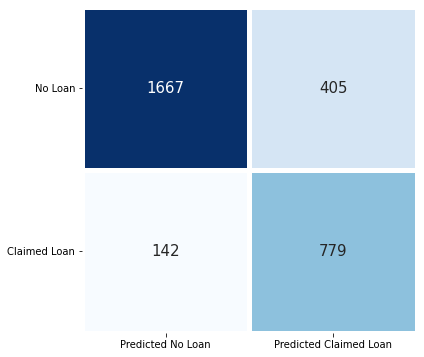

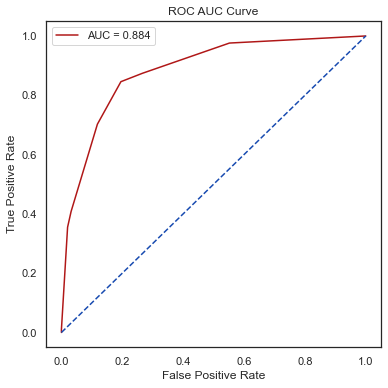

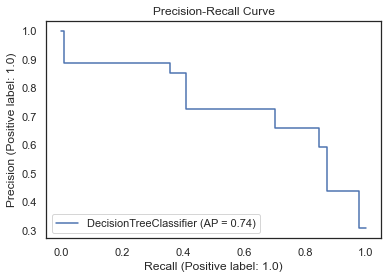

In [ ]:
fn.dt_plot(x_train,y_train,x_test,y_test,'log_loss',max_depth=3,min_split=2)

## 5-2- Bagging ensembel with Dicision Tree base

In [ ]:
measures_bag_dt = ['recall']

In [ ]:
random_params_bag_dt=[{
'base_estimator':[DecisionTreeClassifier()],
'max_features':list(range(3,10)),
'max_samples':np.arange(0.4,0.91,0.05),
'n_estimators':[30,40,50,60,70,80,90,100,125,150,175,200,250,300,350,400,450],
'random_state':[20]} 
]

In [ ]:

start_time=time.time()
best_recall, repeat, base_measure = 0, 10, 'recall'
for i in range(repeat):
    best = fn.random_search(x_train,y_train,BaggingClassifier(),
                                      random_params_bag_dt,
                                      scoring_measure=measures_bag_dt,
                                      cv_num=10,iteration=15)
    print(f"\ntry {i:<5}",end='')
    if best['measures']['recall'] > best_recall:
        best_recall = best['measures']['recall']
        best_random_bag_dt = best
        print(f"Recall: {best_recall:<9}"
              f"Parameters: max_features: {best['params'][base_measure]['max_features']:<6}"
              f"max_samples: {best['params'][base_measure]['max_samples']:<8}"
              f"n_estimators: {best['params'][base_measure]['n_estimators']:<5}",end=''
             )
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try 0    Recall: 83.21    Parameters: max_features: 6     max_samples: 0.7     n_estimators: 60   
try 1    Recall: 83.35    Parameters: max_features: 6     max_samples: 0.8499999999999999n_estimators: 100  
try 2    
try 3    Recall: 83.39    Parameters: max_features: 6     max_samples: 0.6499999999999999n_estimators: 60   
try 4    
try 5    
try 6    
try 7    
try 8    
try 9    
641 sec


In [ ]:
best_random_bag_dt

{'measures': {'recall': 83.39},
 'params': {'recall': {'random_state': 20,
   'n_estimators': 60,
   'max_samples': 0.6499999999999999,
   'max_features': 6,
   'base_estimator': DecisionTreeClassifier()}}}

In [ ]:
'measures': {'recall': 83.39}
'params':
    'n_estimators': 60
    'max_samples': 0.65
    'max_features': 6

In [ ]:

bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                 DecisionTreeClassifier(), max_features=6,
                                 max_samples=0.5, estimators=60,
                                 scoring_measures=measures_bag_dt)


In [ ]:
bagging_dt_measures

{'train': {'recall': 91.81}, 'test': {'recall': 83.82}}

In [ ]:

start_time=time.time()
difference, condition, measure = fn.min_overfit_bagging(x_train,y_train,x_test,y_test,
                                                        DecisionTreeClassifier(),
                                                        random_params_bag_dt,
                                                        measures_bag_dt,cv=10,iter=15,repeat=5)
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


0	recall: 84.47     overfite: 7.610     parameters: max_features: 8, max_samples: 0.40, n_estimators: 30

705 sec


In [ ]:

fn.bagging(x_train, y_train, x_test, y_test,
                                 DecisionTreeClassifier(), max_features=8,
                                 max_samples=0.4, estimators=30,
                                 scoring_measures=measures_bag_dt)


{'train': {'recall': 92.08}, 'test': {'recall': 84.47}}

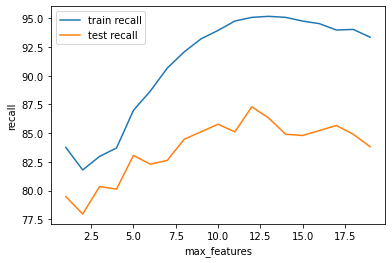

,max_features,Train,Test,Difference
0,1,83.76,79.48,4.28
1,2,81.80,77.96,3.84
2,3,82.98,80.35,2.63
3,4,83.71,80.13,3.58
4,5,86.99,83.06,3.93
5,6,88.67,82.30,6.37
6,7,90.67,82.63,8.04
7,8,92.08,84.47,7.61
8,9,93.22,85.12,8.10
9,10,93.95,85.78,8.17


In [ ]:

train, test, min, max, step = [], [], 1, 19, 1
measure, variable = 'recall', 'max_features'
for max_features in np.arange(min,max+1,step):
    bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     DecisionTreeClassifier(),
                                     max_features=max_features,
                                     max_samples=0.4, estimators=30,
                                     scoring_measures=[measure])
    train.append(bagging_dt_measures['train'][measure])
    test.append(bagging_dt_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table


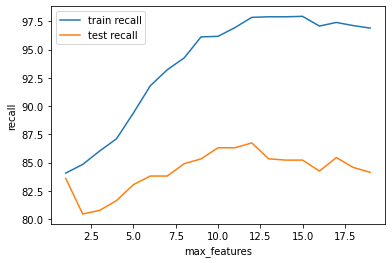

,max_features,Train,Test,Difference
0,1,84.08,83.60,0.48
1,2,84.85,80.46,4.39
2,3,86.03,80.78,5.25
3,4,87.12,81.65,5.47
4,5,89.40,83.06,6.34
5,6,91.81,83.82,7.99
6,7,93.22,83.82,9.40
7,8,94.27,84.91,9.36
8,9,96.13,85.34,10.79
9,10,96.18,86.32,9.86


In [ ]:

train, test, min, max, step = [], [], 1, 19, 1
measure, variable = 'recall', 'max_features'
for max_features in np.arange(min,max+1,step):
    bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     DecisionTreeClassifier(),
                                     max_features=max_features,
                                     max_samples=0.5, estimators=60,
                                     scoring_measures=[measure])
    train.append(bagging_dt_measures['train'][measure])
    test.append(bagging_dt_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table


In [ ]:
bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test, DecisionTreeClassifier(), max_features=12,
                                 max_samples=0.4, estimators=30, scoring_measures=measures_bag_dt)

In [ ]:
bagging_dt_measures

{'train': {'recall': 95.09}, 'test': {'recall': 87.3}}

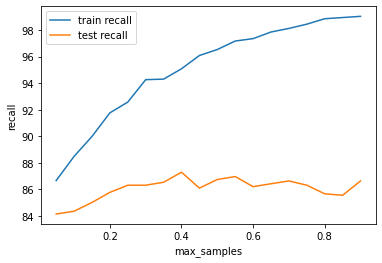

,max_samples,Train,Test,Difference
0,0.05,86.67,84.15,2.52
1,0.10,88.49,84.36,4.13
2,0.15,89.99,85.02,4.97
3,0.20,91.77,85.78,5.99
4,0.25,92.58,86.32,6.26
5,0.30,94.27,86.32,7.95
6,0.35,94.31,86.54,7.77
7,0.40,95.09,87.30,7.79
8,0.45,96.09,86.10,9.99
9,0.50,96.54,86.75,9.79


In [ ]:
train, test, min, max, step = [], [], 0.05, 0.9, 0.05
measure, variable = 'recall', 'max_samples'
for max_samples in np.arange(min,max+step,step):
    print(max_samples,end='\r')
    bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     DecisionTreeClassifier(), max_features=12,
                                 max_samples=max_samples, estimators=30,
                                     scoring_measures=[measure])
    train.append(bagging_dt_measures['train'][measure])
    test.append(bagging_dt_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table

In [ ]:
bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test, DecisionTreeClassifier(), max_features=4,
                                 max_samples=0.1, estimators=30, scoring_measures=measures)

In [ ]:
bagging_dt_measures

{'train': {'recall': 83.1, 'f1': 82.13, 'accuracy': 81.91},
 'test': {'recall': 80.8, 'f1': 71.95, 'accuracy': 80.53}}

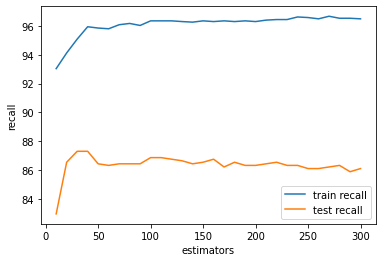

,estimators,Train,Test,Difference
0,10,93.04,82.95,10.09
1,20,94.13,86.54,7.59
2,30,95.09,87.30,7.79
3,40,95.95,87.30,8.65
4,50,95.86,86.43,9.43
5,60,95.81,86.32,9.49
6,70,96.09,86.43,9.66
7,80,96.18,86.43,9.75
8,90,96.04,86.43,9.61
9,100,96.36,86.86,9.50


In [ ]:
train, test, min, max, step, measure, variable = [], [], 10, 300, 10
measure, variable = 'recall', 'estimators'
for estimators in np.arange(min,max+step,step):
    print(estimators,end='\r')
    bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     DecisionTreeClassifier(), max_features=12,
                                 max_samples=0.4, estimators=estimators,
                                     scoring_measures=[measure])
    train.append(bagging_dt_measures['train'][measure])
    test.append(bagging_dt_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table

In [ ]:

bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                 DecisionTreeClassifier(), max_features=12,
                                 max_samples=0.4, estimators=30,
                                 scoring_measures=measures_bag_dt)


In [ ]:
bagging_dt_measures

{'train': {'recall': 95.09}, 'test': {'recall': 87.3}}

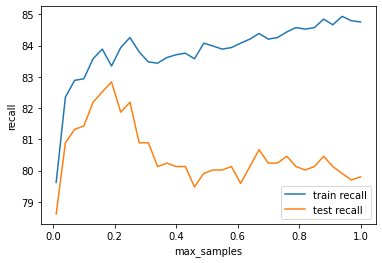

,max_samples,Train,Test,Difference
0,0.01,79.62,78.61,1.01
1,0.04,82.35,80.89,1.46
2,0.07,82.89,81.32,1.57
3,0.10,82.94,81.43,1.51
4,0.13,83.58,82.19,1.39
5,0.16,83.89,82.52,1.37
6,0.19,83.35,82.84,0.51
7,0.22,83.94,81.87,2.07
8,0.25,84.26,82.19,2.07
9,0.28,83.80,80.89,2.91


In [ ]:
train, test, min, max, step = [], [], 0.01, 0.99, 0.03
measure, variable = 'recall', 'max_samples'
for max_samples in np.arange(min,max+step,step):
    print(max_samples,end='\r')
    bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     DecisionTreeClassifier(), max_features=4,
                                 max_samples=max_samples, estimators=30,
                                     scoring_measures=[measure])
    train.append(bagging_dt_measures['train'][measure])
    test.append(bagging_dt_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table

In [ ]:
bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test, DecisionTreeClassifier(), max_features=4,
                                 max_samples=0.1, estimators=37, scoring_measures=measures_bag_dt)

In [ ]:
bagging_dt_measures

{'train': {'recall': 82.85}, 'test': {'recall': 81.65}}

--------- Result for Bagging on test data ---------

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87      2072
         1.0       0.67      0.87      0.76       921

    accuracy                           0.83      2993
   macro avg       0.80      0.84      0.81      2993
weighted avg       0.85      0.83      0.84      2993

ROC AUC score: 0.91
Accuracy Score: 0.83


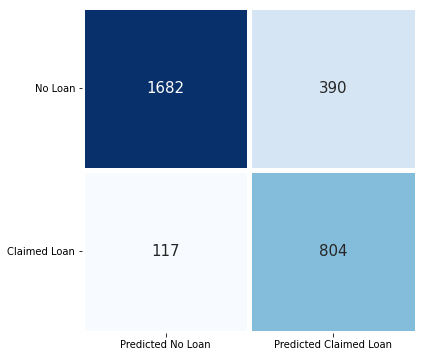

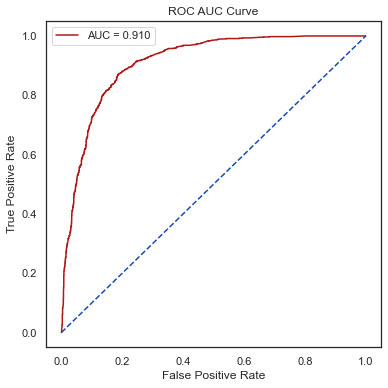

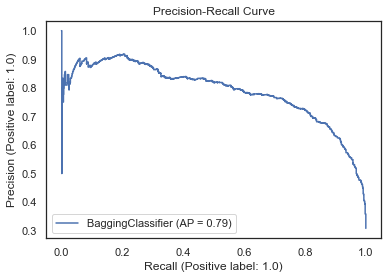

In [ ]:

fn.bagging_plot(x_train, y_train, x_test, y_test,
                DecisionTreeClassifier(), max_features=12,
                max_samples=0.4, estimators=30)


## 5-3- Bagging ensembel with KNN base

In [ ]:
measures_bag_knn = ['recall']

In [ ]:
random_params_bag_knn=[{
'base_estimator':[KNeighborsClassifier()],
'max_features':list(range(3,10)),
'max_samples':np.arange(0.4,0.91,0.05),
'n_estimators':[30,40,50,60,70,80,90,100,125,150,175,200,250,300,350,400,450],
'random_state':[20]} 
]

In [ ]:

start_time=time.time()
best_recall, repeat, base_measure = 0, 10, 'recall'
for i in range(repeat):
    best = fn.random_search(x_train,y_train,BaggingClassifier(),
                                      random_params_bag_knn,
                                      scoring_measure=measures_bag_knn,
                                      cv_num=10,iteration=10)
    print(f"\ntry {i:<3}",end='')
    if best['measures']['recall'] > best_recall:
        best_recall = best['measures']['recall']
        best_random_bag_dt = best
        print(f"Recall:{best_recall:<7}"
              f"max_features: {best['params'][base_measure]['max_features']:<3}"
              f"max_samples: {best['params'][base_measure]['max_samples']:0.2f}  "
              f"n_estimators: {best['params'][base_measure]['n_estimators']}",end=''
             )
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try 0  Recall:87.13  max_features: 7  max_samples: 0.65  n_estimators: 90
try 1  
try 2  
try 3  
try 4  
try 5  
try 6  Recall:87.35  max_features: 8  max_samples: 0.85  n_estimators: 125
try 7  
try 8  
try 9  
1503 sec


In [ ]:
best_random_bag_dt

{'measures': {'recall': 87.17, 'accuracy': 83.28},
 'params': {'recall': {'random_state': 20,
   'n_estimators': 80,
   'max_samples': 0.8999999999999999,
   'max_features': 9,
   'base_estimator': KNeighborsClassifier()},
  'accuracy': {'random_state': 20,
   'n_estimators': 80,
   'max_samples': 0.45,
   'max_features': 9,
   'base_estimator': KNeighborsClassifier()}}}

In [ ]:

start_time=time.time()
difference, condition, measure = fn.min_overfit_bagging(x_train,y_train,x_test,y_test,
                                                        KNeighborsClassifier(),
                                                        random_params_bag_knn,
                                                        measures_bag_knn,cv=10,iter=10,repeat=5)
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


try 0	recall: 87.08     overfite: 2.910  max_features: 9  , max_samples: 0.40, n_estimators: 175

1665 sec


In [ ]:

fn.bagging(x_train, y_train, x_test, y_test,
                                 KNeighborsClassifier(), max_features=9,
                                 max_samples=0.4, estimators=175,
                                 scoring_measures=measures_bag_knn)


{'train': {'recall': 89.99}, 'test': {'recall': 87.08}}

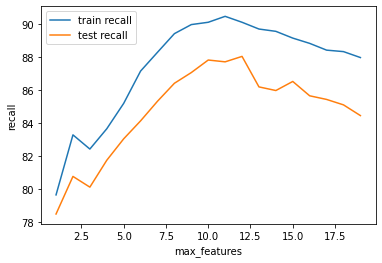

,max_features,Train,Test,Difference
0,1,79.66,78.50,1.16
1,2,83.30,80.78,2.52
2,3,82.44,80.13,2.31
3,4,83.67,81.76,1.91
4,5,85.21,83.06,2.15
5,6,87.17,84.15,3.02
6,7,88.31,85.34,2.97
7,8,89.44,86.43,3.01
8,9,89.99,87.08,2.91
9,10,90.13,87.84,2.29


In [ ]:

train, test, min, max, step = [], [], 1, 19, 1
measure, variable = 'recall', 'max_features'
for max_features in np.arange(min,max+step,step):
    bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     KNeighborsClassifier(),
                                     max_features=max_features,
                                     max_samples=0.4, estimators=175,
                                     scoring_measures=[measure])
    train.append(bagging_dt_measures['train'][measure])
    test.append(bagging_dt_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table


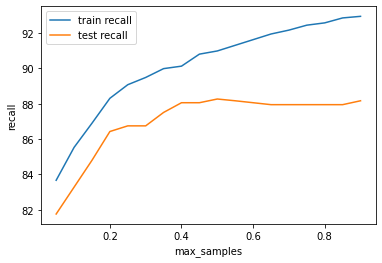


591 sec


In [ ]:

start_time=time.time()
train, test, min, max, step = [], [], 0.05, 0.9, 0.05
measure, variable = 'recall', 'max_samples'
for max_samples in np.arange(min,max+step,step):
    print(max_samples,end='\r')
    bagging_knn_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     KNeighborsClassifier(), max_features=12,
                                 max_samples=max_samples, estimators=175,
                                     scoring_measures=[measure])
    train.append(bagging_knn_measures['train'][measure])
    test.append(bagging_knn_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


In [ ]:
table

,max_samples,Train,Test,Difference
0,0.05,83.67,81.76,1.91
1,0.10,85.53,83.28,2.25
2,0.15,86.90,84.80,2.10
3,0.20,88.31,86.43,1.88
4,0.25,89.08,86.75,2.33
5,0.30,89.49,86.75,2.74
6,0.35,89.99,87.51,2.48
7,0.40,90.13,88.06,2.07
8,0.45,90.81,88.06,2.75
9,0.50,90.99,88.27,2.72


In [ ]:

bagging_knn_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                  KNeighborsClassifier(), max_features=12,
                                 max_samples=0.5, estimators=175,
                                  scoring_measures=measures_bag_knn)


In [ ]:
bagging_dt_measures

{'train': {'recall': 87.99}, 'test': {'recall': 84.47}}

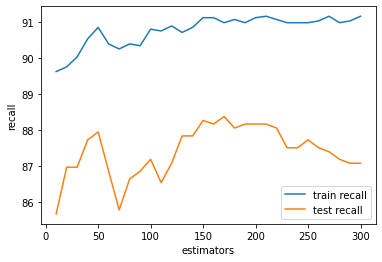


2359 sec


In [ ]:
start_time=time.time()
train, test, min, max, step = [], [], 10, 300, 10
measure, variable = 'recall', 'estimators'
for estimators in np.arange(min,max+step,step):
    print(estimators,end='\r')
    bagging_knn_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                     KNeighborsClassifier(), max_features=12,
                                 max_samples=0.5, estimators=estimators,
                                     scoring_measures=[measure])
    train.append(bagging_knn_measures['train'][measure])
    test.append(bagging_knn_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


In [ ]:
table

,estimators,Train,Test,Difference
0,10,89.63,85.67,3.96
1,20,89.76,86.97,2.79
2,30,90.04,86.97,3.07
3,40,90.54,87.73,2.81
4,50,90.86,87.95,2.91
5,60,90.40,86.86,3.54
6,70,90.26,85.78,4.48
7,80,90.40,86.64,3.76
8,90,90.35,86.86,3.49
9,100,90.81,87.19,3.62


In [ ]:

bagging_dt_measures = fn.bagging(x_train, y_train, x_test, y_test,
                                 KNeighborsClassifier(), max_features=12,
                                 max_samples=0.5, estimators=170,
                                 scoring_measures=measures_bag_knn)


In [ ]:
bagging_dt_measures

{'train': {'recall': 90.99}, 'test': {'recall': 88.38}}

--------- Result for Bagging on test data ---------

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.85      2072
         1.0       0.65      0.88      0.75       921

    accuracy                           0.82      2993
   macro avg       0.79      0.83      0.80      2993
weighted avg       0.85      0.82      0.82      2993

ROC AUC score: 0.91
Accuracy Score: 0.82


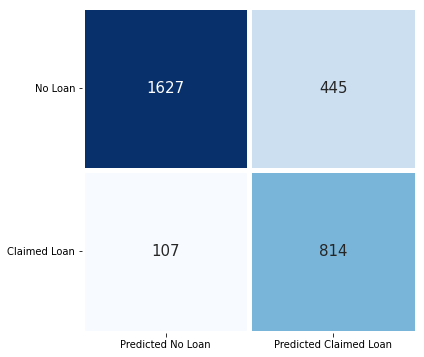

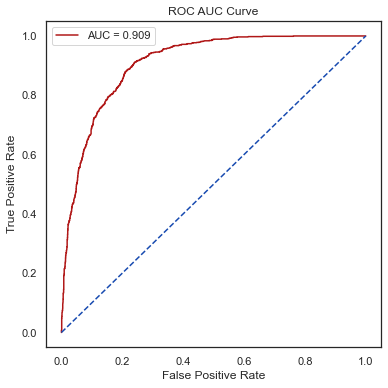

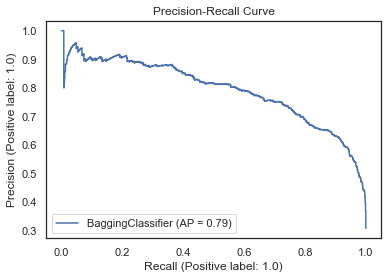

In [ ]:

fn.bagging_plot(x_train, y_train, x_test, y_test,
                KNeighborsClassifier(), max_features=12,
                max_samples=0.5, estimators=170)


## 5-4- Random Forest

In [ ]:
measures_rf = ['recall']

In [ ]:
random_params_rf=[{
'criterion':['gini','entropy','log_loss'],
'max_depth':list(range(3,20)),
'max_features':list(range(3,20)),
'max_samples':np.arange(0.4,0.91,0.05),
'min_samples_split':list(range(10,301,5)),
'n_estimators':list(range(20,450,5)),
'random_state':[20]} 
]

In [ ]:

start_time=time.time()
best_recall, repeat, base_measure = 0, 10, 'recall'
for i in range(repeat):
    best = fn.random_search(x_train,y_train,RandomForestClassifier(),
                                      random_params_rf,
                                      scoring_measure=measures_rf,
                                      cv_num=10,iteration=15)
    print(f"\ntry {i}",end='\t')
    if best['measures']['recall'] > best_recall:
        best_recall = best['measures']['recall']
        best_random_rf = best
        print(f"Recall: {best_recall:<9}"
              f"criterion: {best['params'][base_measure]['criterion']:<10}"
              f"max_depth: {best['params'][base_measure]['max_depth']:<4}"
              f"min_samples_split: {best['params'][base_measure]['min_samples_split']:<6}\n\t"
              f"max_features: {best['params'][base_measure]['max_features']:<4}"
              f"max_samples: {best['params'][base_measure]['max_samples']:0.2f}\t"
              f"n_estimators: {best['params'][base_measure]['n_estimators']:<5}",end=''
             )
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try	Recall: 85.3     criterion: log_loss  max_depth: 17  min_samples_split: 15    
	max_features: 16  max_samples: 0.65	n_estimators: 325  
try	
try	Recall: 85.44    criterion: entropy   max_depth: 17  min_samples_split: 10    
	max_features: 16  max_samples: 0.40	n_estimators: 50   
try	
try	Recall: 86.26    criterion: log_loss  max_depth: 12  min_samples_split: 25    
	max_features: 4   max_samples: 0.50	n_estimators: 285  
try	
try	
try	
try	
try	
1676 sec


In [ ]:
best_random_rf

{'measures': {'recall': 86.26},
 'params': {'recall': {'random_state': 20,
   'n_estimators': 285,
   'min_samples_split': 25,
   'max_samples': 0.5,
   'max_features': 4,
   'max_depth': 12,
   'criterion': 'log_loss'}}}

In [ ]:
rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                    criterion='log_loss', max_depth=12,
                    max_features=4, max_samples=0.5,
                    min_split=25, estimators=285,
                    scoring_measures=measures_rf)

In [ ]:
rf_measures

{'train': {'recall': 88.03}, 'test': {'recall': 86.1}}

In [ ]:

start_time=time.time()
difference, condition, measure = fn.min_overfit_rf(x_train,y_train,x_test,y_test,
                                                   random_params_rf,measures_rf,
                                                   cv=10,iter=15,repeat=5)
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try 0   recall: 85.67   overfite: 2.680   criterion: gini      max_depth: 15  min_samples_split: 20    max_features: 6   max_samples: 0.40n_estimators: 150  

try 1   
try 2   
try 3   recall: 85.88   overfite: 0.440   criterion: entropy   max_depth: 19  min_samples_split: 210   max_features: 19  max_samples: 0.50n_estimators: 300  

try 4   recall: 84.04   overfite: 0.350   criterion: log_loss  max_depth: 4   min_samples_split: 200   max_features: 17  max_samples: 0.50n_estimators: 350  

1359 sec


In [ ]:

rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                    criterion='log_loss', max_depth=4,
                    max_features=17, max_samples=0.50,
                    min_split=200, estimators=350,
                    scoring_measures=measures_rf)


In [ ]:
rf_measures

{'train': {'recall': 84.39}, 'test': {'recall': 84.04}}

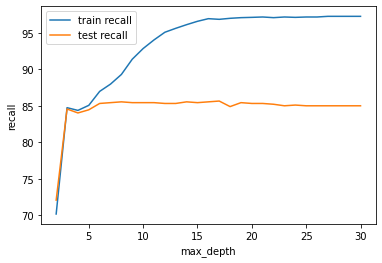


197 sec


In [ ]:
start_time=time.time()
train, test, min, max, step = [], [], 2, 30, 1
measure, variable = 'recall', 'max_depth'
for max_depth in np.arange(min,max+step,step):
    print(max_depth,end='\r')
    rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                        criterion='log_loss',max_features=4,
                        max_depth=max_depth,max_samples=0.5,
                        min_split=2,estimators=285,
                        scoring_measures=[measure])
    train.append(rf_measures['train'][measure])
    test.append(rf_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


In [ ]:
table

,max_depth,Train,Test,Difference
0,2,70.20,72.10,-1.90
1,3,84.76,84.58,0.18
2,4,85.26,85.88,-0.62
3,5,85.30,85.88,-0.58
4,6,85.44,85.88,-0.44
5,7,85.44,85.88,-0.44
6,8,85.44,85.88,-0.44
7,9,85.44,85.88,-0.44
8,10,85.44,85.88,-0.44
9,11,85.44,85.88,-0.44


In [ ]:
rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                    criterion='gini', max_depth=7,
                    max_features=10,  max_samples=0.7,
                    min_split=50, estimators=100,
                    scoring_measures=measures_rf)
rf_measures

In [ ]:
start_time=time.time()
train, test, min, max, step = [], [], 3, 19, 1
measure, variable = 'recall', 'max_features'
for max_features in np.arange(min,max+step,step):
    print(max_features,end='\r')
    rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                        criterion='entropy',max_features=max_features,
                        max_depth=111,max_samples=0.5,
                        min_split=2,estimators=300,
                        scoring_measures=[measure])
    train.append(rf_measures['train'][measure])
    test.append(rf_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


In [ ]:
start_time=time.time()
train, test, min, max, step = [], [], 0.05, 0.96, 0.05
measure, variable = 'recall', 'max_samples'
for max_samples in np.arange(min,max+step,step):
    print(max_samples,end='\r')
    rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                        criterion='entropy',max_features=111,
                        max_depth=111,max_samples=max_samples,
                        min_split=2,estimators=300,
                        scoring_measures=[measure])
    train.append(rf_measures['train'][measure])
    test.append(rf_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


In [ ]:
start_time=time.time()
train, test, min, max, step = [], [], 2, 501, 2
measure, variable = 'recall', 'min_split'
for min_split in np.arange(min,max+step,step):
    print(min_split,end='\r')
    rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                        criterion='entropy',max_features=111,
                        max_depth=10000,max_samples=max_samples,
                        min_split=min_split,estimators=300,
                        scoring_measures=[measure])
    train.append(rf_measures['train'][measure])
    test.append(rf_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


In [ ]:
start_time=time.time()
train, test, min, max, step = [], [], 2, 501, 2
measure, variable = 'recall', 'estimators'
for estimators in np.arange(min,max+step,step):
    print(estimators,end='\r')
    rf_measures = fn.rf(x_train, y_train, x_test, y_test,
                        criterion='entropy',max_features=111,
                        max_depth=10000,max_samples=max_samples,
                        min_split=111,estimators=estimators,
                        scoring_measures=[measure])
    train.append(rf_measures['train'][measure])
    test.append(rf_measures['test'][measure])
plt,table = fn.change_plot(variable,min,max,step,train,test,measure)
plt.show()
table
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)


In [ ]:
rf_measures = fn.rf(x_train, y_train, x_test, y_test, criterion='gini', max_depth=7, max_features=10,
                    max_samples=0.7, min_split=50, estimators=100, scoring_measures=measures_rf)

In [ ]:
rf_measures

{'train': {'recall': 88.24, 'accuracy': 85.82},
 'test': {'recall': 85.33, 'accuracy': 83.0}}

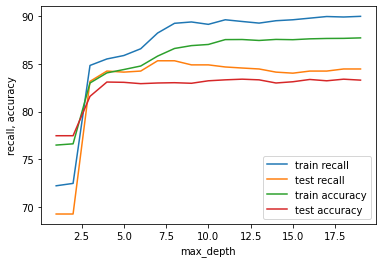

,max_depth,Train_recall,Test_recall,Train_accuracy,Test_accuracy,Difference
0,1,72.22,69.26,76.49,77.47,2.96
1,2,72.47,69.26,76.62,77.47,3.21
2,3,84.84,83.17,83.00,81.60,1.67
3,4,85.52,84.25,84.06,83.10,1.27
4,5,85.88,84.14,84.41,83.07,1.74
5,6,86.59,84.25,84.78,82.93,2.34
6,7,88.24,85.33,85.82,83.00,2.91
7,8,89.26,85.33,86.62,83.03,3.93
8,9,89.40,84.90,86.92,82.97,4.50
9,10,89.15,84.90,87.04,83.23,4.25


In [ ]:
train_rec, test_rec, train_acc, test_acc, min, max, step, variable =\
[],        [],       [],        [],       1,   20,  1,   'max_depth'
for depth in np.arange(min,max,step):
    print(depth,end='\r')
    rf_measures = fn.rf(x_train, y_train, x_test, y_test, criterion='gini', max_depth=depth, max_features=10,
                    max_samples=0.7, min_split=50, estimators=100, scoring_measures=measures_rf)
    train_rec.append(rf_measures['train']['recall'])
    test_rec.append(rf_measures['test']['recall'])
    train_acc.append(rf_measures['train']['accuracy'])
    test_acc.append(rf_measures['test']['accuracy'])
plt,table = fn.change_plot2(variable,min,max,step,train_rec,test_rec,'recall', train_acc,test_acc,'accuracy')
plt.show()
table

--------- Result for Random Forest on test data ---------

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      2072
         1.0       0.69      0.87      0.77       921

    accuracy                           0.84      2993
   macro avg       0.81      0.85      0.82      2993
weighted avg       0.86      0.84      0.84      2993

ROC AUC score: 0.92
Accuracy Score: 0.84


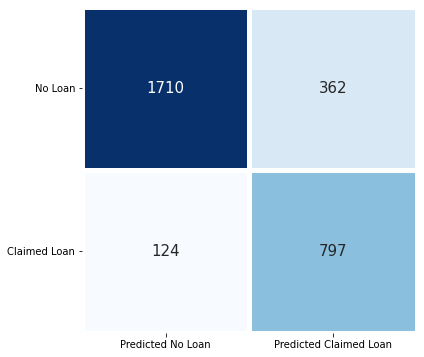

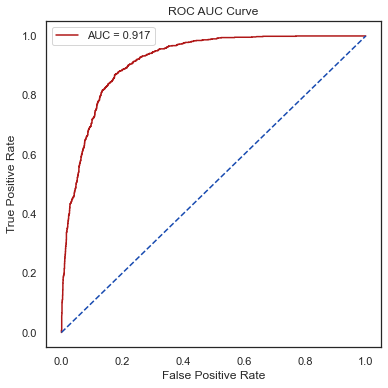

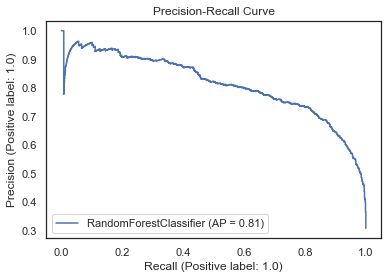

In [ ]:
fn.rf_plot(x_train, y_train, x_test, y_test,
           criterion='log_loss', max_depth=15,
           max_features=4,max_samples=0.5,
           min_split=2, estimators=285)

## 5-5- AdaBoost

In [ ]:
measures_ab = ['recall']

In [ ]:
random_params_ab=[{
'algorithm':['SAMME', 'SAMME.R'],
'learning_rate':list(np.arange(0.05,0.99,0.2)),
'n_estimators':list(np.arange(20,410,10)),
'random_state':[20]}]

In [ ]:

start_time=time.time()
best_recall, repeat, base_measure = 0, 5, 'recall'
for i in range(repeat):
    best = fn.random_search(x_train,y_train,AdaBoostClassifier(),
                                      random_params_ab,
                                      scoring_measure=measures_ab,
                                      cv_num=10,iteration=10)
    print(f"\ntry {i}",end='\t')
    if best['measures']['recall'] > best_recall:
        best_recall = best['measures']['recall']
        best_random_ab = best
        print(f"Recall: {best_recall:<9}"
              f"algorithm: {best['params'][base_measure]['algorithm']:<12}"
              f"learning_rate: {best['params'][base_measure]['learning_rate']:<6}"
              f"n_estimators: {best['params'][base_measure]['n_estimators']:<5}",end=''
             )
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try 0	Recall: 85.94    algorithm: SAMME.R     learning_rate: 0.05  n_estimators: 270  
try 1	Recall: 86.62    algorithm: SAMME       learning_rate: 0.25  n_estimators: 310  
try 2	
try 3	
try 4	
547 sec


In [ ]:
best_random_ab

{'measures': {'recall': 86.62},
 'params': {'recall': {'random_state': 20,
   'n_estimators': 310,
   'learning_rate': 0.25,
   'algorithm': 'SAMME'}}}

In [ ]:
ab_measure = fn.ab(x_train,y_train,x_test,y_test,
                   algorithm='SAMME',estimators=310,
                   learning_rate=0.25,
                   scoring_measures=measures_ab)

In [ ]:
ab_measure

{'train': {'recall': 86.21}, 'test': {'recall': 85.88}}

In [ ]:

start_time=time.time()
difference, condition, measure = fn.min_overfit_ab(x_train,y_train,x_test,y_test,
                                                   random_params_ab,measures_ab,
                                                   cv=10,iter=10,repeat=5)
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try 0   recall: 85.88   overfit: 0.470   algorithm: SAMME.R   learning_rate: 0.25n_estimators: 50    

try 1   
try 2   recall: 86.21   overfit: 0.050   algorithm: SAMME.R   learning_rate: 0.25n_estimators: 30    

try 3   
try 4   
510 sec


In [ ]:

ab_measure = fn.ab(x_train,y_train,x_test,y_test,
                   algorithm='SAMME.R',estimators=30,
                   learning_rate=0.25,
                   scoring_measures=measures_ab)


In [ ]:
ab_measure

{'train': {'recall': 86.26}, 'test': {'recall': 86.21}}

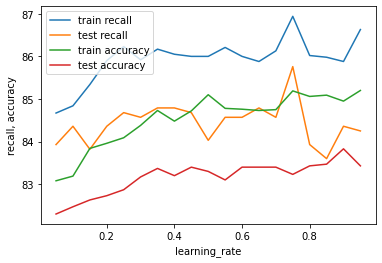

,learning_rate,Train_recall,Test_recall,Train_accuracy,Test_accuracy,Difference
0,0.05,84.67,83.93,83.08,82.30,0.74
1,0.10,84.84,84.36,83.19,82.47,0.48
2,0.15,85.34,83.82,83.84,82.63,1.52
3,0.20,85.90,84.36,83.96,82.73,1.54
4,0.25,86.23,84.68,84.09,82.87,1.55
5,0.30,85.92,84.57,84.38,83.17,1.35
6,0.35,86.17,84.79,84.73,83.37,1.38
7,0.40,86.05,84.79,84.48,83.20,1.26
8,0.45,86.00,84.68,84.72,83.40,1.32
9,0.50,86.00,84.03,85.10,83.30,1.97


In [ ]:
train_rec, test_rec, train_acc, test_acc, min, max, step, variable =\
[],        [],       [],        [],       0.05,   0.96,  0.05,   'learning_rate'
for learning in np.arange(min,max,step):
    print(learning,end='\r')
    ab_measures = fn.ab(x_train, y_train, x_test, y_test, algorithm='SAMME', learning_rate=learning, estimators=220,
                        scoring_measures=measures_ab)
    train_rec.append(ab_measures['train']['recall'])
    test_rec.append(ab_measures['test']['recall'])
    train_acc.append(ab_measures['train']['accuracy'])
    test_acc.append(ab_measures['test']['accuracy'])
plt,table = fn.change_plot2(variable,min,max,step,train_rec,test_rec,'recall', train_acc,test_acc,'accuracy')
plt.show()
table

In [ ]:
ab_measure = fn.ab(x_train,y_train,x_test,y_test,algorithm='SAMME',learning_rate=0.75,estimators=220,
                   scoring_measures=measures_ab)

In [ ]:
ab_measure

{'train': {'recall': 86.94, 'accuracy': 85.19},
 'test': {'recall': 85.76, 'accuracy': 83.23}}

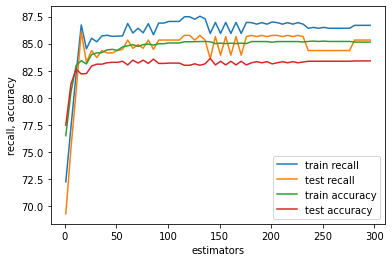

,estimators,Train_recall,Test_recall,Train_accuracy,Test_accuracy,Difference
0,1,72.22,69.26,76.49,77.47,2.96
1,6,77.26,75.30,80.50,81.27,1.96
2,11,82.19,80.58,82.98,82.63,1.61
3,16,86.73,86.08,83.42,82.20,0.65
4,21,84.52,83.28,83.12,82.23,1.24
5,26,85.50,84.36,83.99,82.93,1.14
6,31,85.17,83.71,84.14,83.10,1.46
7,36,85.71,84.36,84.17,83.10,1.35
8,41,85.77,84.14,84.42,83.23,1.63
9,46,85.67,84.14,84.47,83.27,1.53


In [ ]:
train_rec, test_rec, train_acc, test_acc, min, max, step, variable =\
[],        [],       [],        [],       1,   301,  5,   'estimators'
for estimators in np.arange(min,max,step):
    print(estimators,end='\r')
    ab_measures = fn.ab(x_train, y_train, x_test, y_test, algorithm='SAMME', learning_rate=0.75, estimators=estimators,
                        scoring_measures=measures_ab)
    train_rec.append(ab_measures['train']['recall'])
    test_rec.append(ab_measures['test']['recall'])
    train_acc.append(ab_measures['train']['accuracy'])
    test_acc.append(ab_measures['test']['accuracy'])
plt,table = fn.change_plot2(variable,min,max,step,train_rec,test_rec,'recall', train_acc,test_acc,'accuracy')
plt.show()
table

In [ ]:
ab_measure = fn.ab(x_train,y_train,x_test,y_test,algorithm='SAMME',learning_rate=0.75,estimators=216,
                   scoring_measures=measures_ab)

In [ ]:
ab_measure

{'train': {'recall': 86.94, 'accuracy': 85.19},
 'test': {'recall': 85.76, 'accuracy': 83.23}}

--------- Result for AdaBoost on test data ---------

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      2072
         1.0       0.69      0.86      0.77       921

    accuracy                           0.84      2993
   macro avg       0.81      0.85      0.82      2993
weighted avg       0.86      0.84      0.84      2993

ROC AUC score: 0.92
Accuracy Score: 0.84


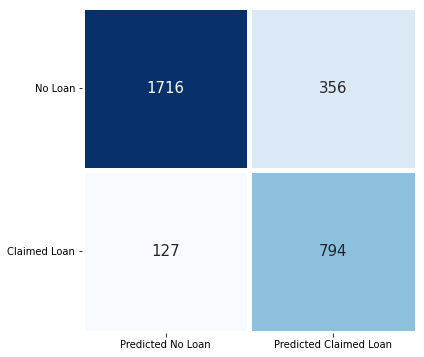

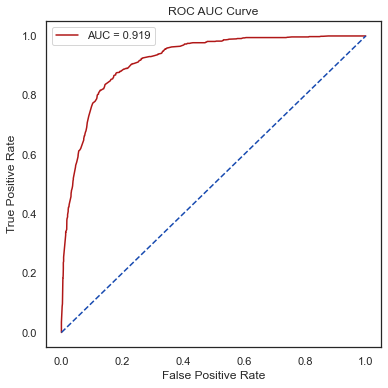

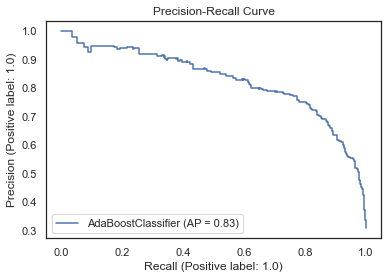

In [ ]:
fn.ab_plot(x_train,y_train,x_test,y_test,
           algorithm='SAMME.R',learning_rate=0.25,
           estimators=30)

## 5-6- KNN

In [ ]:
measures_knn = ['recall','accuracy']

In [ ]:
grid_params_knn=[{
'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
'n_neighbors':list(np.arange(3,20,1))
}]

In [ ]:
best_grid_knn = fn.grid_search(x_train,y_train,
                               KNeighborsClassifier(),
                               grid_params_knn,
                               measures_knn,cv_num=5)

In [ ]:
best_grid_knn

{'measures': {'recall': 87.08, 'accuracy': 81.28},
 'params': {'recall': {'metric': 'manhattan', 'n_neighbors': 19},
  'accuracy': {'metric': 'manhattan', 'n_neighbors': 19}}}

In [ ]:
knn_measure = fn.knn(x_train,y_train,x_test,y_test,
                     dist_func='manhattan',neighbors=19,
                     scoring_measures=measures_knn)

In [ ]:
knn_measure

{'train': {'recall': 89.04, 'accuracy': 83.23},
 'test': {'recall': 87.3, 'accuracy': 79.12}}

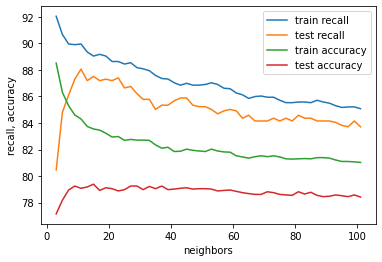

,neighbors,Train_recall,Test_recall,Train_accuracy,Test_accuracy,Difference
0,3,92.04,80.46,88.51,77.15,11.58
1,5,90.67,84.80,86.31,78.18,5.87
2,7,89.95,86.10,85.30,78.95,3.85
3,9,89.90,87.30,84.60,79.25,2.60
4,11,89.95,88.06,84.30,79.08,1.89
5,13,89.35,87.19,83.74,79.18,2.16
6,15,89.04,87.51,83.55,79.39,1.53
7,17,89.17,87.19,83.46,78.92,1.98
8,19,89.04,87.30,83.23,79.12,1.74
9,21,88.63,87.19,82.94,79.05,1.44


In [ ]:
train1, test1, train2, test2, min, max, step, measure1,measure2, variable =\
[],     [],    [],     [],    3,   100,  2,   'recall', 'accuracy', 'neighbors'
for neighbors in np.arange(min,max+step,step):
    print(neighbors,end='\r')
    knn_measures = fn.knn(x_train,y_train,x_test,y_test,
                          dist_func='manhattan',
                          neighbors=neighbors,
                          scoring_measures=measures_knn)
    train1.append(knn_measures['train'][measure1])
    test1.append(knn_measures['test'][measure1])
    train2.append(knn_measures['train'][measure2])
    test2.append(knn_measures['test'][measure2])
plt,table = fn.change_plot2(variable,min,max,step,train1,test1,
                            measure1, train2,test2,measure2)
plt.show()
table

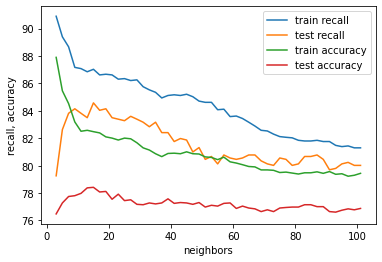

,neighbors,Train_recall,Test_recall,Train_accuracy,Test_accuracy,Difference
0,3,90.90,79.26,87.90,76.48,11.64
1,5,89.40,82.63,85.46,77.28,6.77
2,7,88.67,83.82,84.53,77.75,4.85
3,9,87.17,84.15,83.19,77.81,3.02
4,11,87.08,83.82,82.51,77.98,3.26
5,13,86.85,83.50,82.58,78.38,3.35
6,15,87.03,84.58,82.48,78.42,2.45
7,17,86.62,84.04,82.39,78.08,2.58
8,19,86.67,84.15,82.10,78.12,2.52
9,21,86.62,83.50,82.01,77.55,3.12


In [ ]:
train1, test1, train2, test2, min, max, step, measure1,measure2, variable =\
[],     [],    [],     [],    3,   100,  2,   'recall', 'accuracy', 'neighbors'
for neighbors in np.arange(min,max+step,step):
    print(neighbors,end='\r')
    knn_measures = fn.knn(x_train,y_train,x_test,y_test,
                          dist_func='euclidean',
                          neighbors=neighbors,
                          scoring_measures=measures_knn)
    train1.append(knn_measures['train'][measure1])
    test1.append(knn_measures['test'][measure1])
    train2.append(knn_measures['train'][measure2])
    test2.append(knn_measures['test'][measure2])
plt,table = fn.change_plot2(variable,min,max,step,train1,test1,
                            measure1, train2,test2,measure2)
plt.show()
table

--------- Result for KNN on test data ---------

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      2072
         1.0       0.61      0.88      0.72       921

    accuracy                           0.79      2993
   macro avg       0.77      0.82      0.78      2993
weighted avg       0.83      0.79      0.80      2993

ROC AUC score: 0.89
Accuracy Score: 0.79


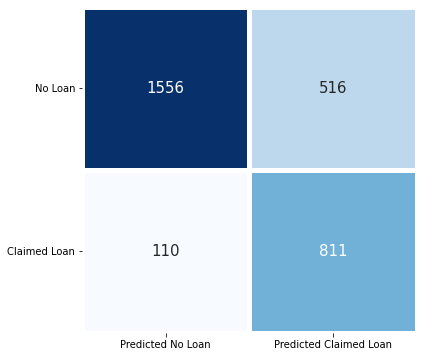

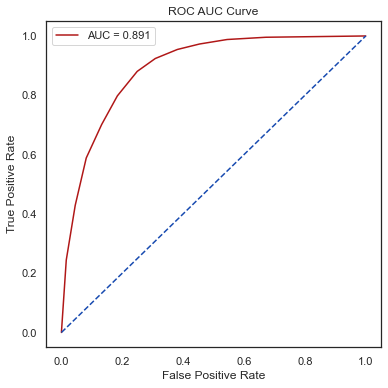

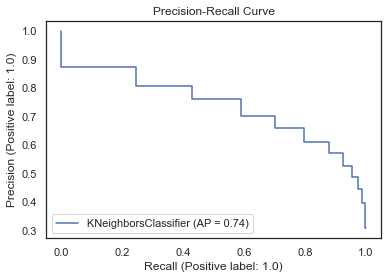

In [ ]:
fn.knn_plot(x_train,y_train,x_test,y_test,
            dist_func='manhattan',neighbors=11)

## 5-7- SVM

In [ ]:
measures_svm = ['recall','accuracy']

In [ ]:
random_params_svm=[{
'C':np.arange(0.01,0.99,0.01),
'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
'random_state':[20]}]

In [ ]:

start_time=time.time()
best_recall, repeat, base_measure = 0, 5, 'recall'
for i in range(repeat):
    best = fn.random_search(x_train,y_train,SVC(),
                                      random_params_svm,
                                      scoring_measure=measures_svm,
                                      cv_num=10,iteration=10)
    print(f"\ntry {i}",end='\t')
    if best['measures']['recall'] > best_recall:
        best_recall = best['measures']['recall']
        best_random_svm = best
        print(f"Recall: {best_recall:<9}"
              f"C: {best['params'][base_measure]['C']:0.2f}     "
              f"kernel: {best['params'][base_measure]['kernel']:<12}",end=''
             )
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try 0	Recall: 88.95    C: 0.01     kernel: poly        
try 1	
try 2	Recall: 89.76    C: 0.14     kernel: poly        
try 3	
try 4	
690 sec


In [ ]:
best_random_svm

{'measures': {'recall': 89.76, 'accuracy': 84.58},
 'params': {'recall': {'random_state': 20, 'kernel': 'poly', 'C': 0.14},
  'accuracy': {'random_state': 20, 'kernel': 'linear', 'C': 0.25}}}

In [ ]:
svm_measures = fn.svm(x_train, y_train, x_test, y_test,
                    C_value=0.14, kernel='poly',
                    scoring_measures=measures_svm)

In [ ]:
svm_measures

{'train': {'recall': 89.72, 'accuracy': 84.14},
 'test': {'recall': 90.88, 'accuracy': 81.36}}

In [ ]:

start_time=time.time()
difference, condition, measure = fn.min_overfit_svm(x_train,y_train,x_test,y_test,
                                                   random_params_svm,measures_svm,
                                                   cv=10,iter=10,repeat=5)
end_time=time.time()
print(f"\n{end_time-start_time:0.0f} sec")
winsound.Beep(1000, 500)



try 0   recall: 90.99   overfit: 1.320   C: 0.36000000000000004kernel: rbf      

try 1   recall: 90.34   overfit: 0.710   C: 0.6            kernel: rbf      

try 2   
try 3   recall: 90.88   overfit: 0.480   C: 0.01           kernel: poly     

try 4   
681 sec


In [ ]:
svm_measures = fn.svm(x_train, y_train, x_test, y_test,
                    C_value=0.01, kernel='poly',
                    scoring_measures=measures_svm)

In [ ]:
svm_measures

{'train': {'recall': 90.4, 'accuracy': 81.94},
 'test': {'recall': 90.88, 'accuracy': 78.12}}

In [ ]:
svm_measures = fn.svm(x_train, y_train, x_test, y_test,
                    C_value=0.36, kernel='rbf',
                    scoring_measures=measures_svm)

In [ ]:
svm_measures

{'train': {'recall': 89.67, 'accuracy': 83.89},
 'test': {'recall': 90.99, 'accuracy': 81.02}}

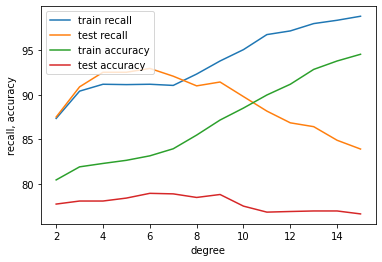

,degree,Train_recall,Test_recall,Train_accuracy,Test_accuracy,Difference
0,2,87.35,87.51,80.48,77.78,-0.16
1,3,90.40,90.88,81.94,78.12,-0.48
2,4,91.17,92.51,82.32,78.12,-1.34
3,5,91.13,92.51,82.67,78.45,-1.38
4,6,91.17,92.94,83.17,78.98,-1.77
5,7,91.04,92.07,83.96,78.92,-1.03
6,8,92.31,90.99,85.49,78.52,1.32
7,9,93.77,91.42,87.17,78.85,2.35
8,10,95.04,89.79,88.51,77.55,5.25
9,11,96.72,88.17,89.97,76.88,8.55


In [ ]:
train1, test1, train2, test2, min, max, step, measure1,measure2, variable =\
[],     [],    [],     [],    2,   15,  1,   'recall', 'accuracy', 'degree'
for degree in np.arange(min,max+step,step):
    print(degree,end='\r')
    classifier = SVC(C =0.01, kernel = 'poly', degree=degree,
                     random_state = 20, probability = True)
    svm_measures = fn.model_fit(x_train, y_train, x_test,
                                y_test, classifier, measures_svm)
    train1.append(svm_measures['train'][measure1])
    test1.append(svm_measures['test'][measure1])
    train2.append(svm_measures['train'][measure2])
    test2.append(svm_measures['test'][measure2])
plt,table = fn.change_plot2(variable,min,max,step,train1,test1,
                            measure1, train2,test2,measure2)
plt.show()
table

--------- Result for SVM on test data ---------

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      2072
         1.0       0.60      0.93      0.73       921

    accuracy                           0.79      2993
   macro avg       0.78      0.83      0.78      2993
weighted avg       0.85      0.79      0.80      2993

ROC AUC score: 0.91
Accuracy Score: 0.79


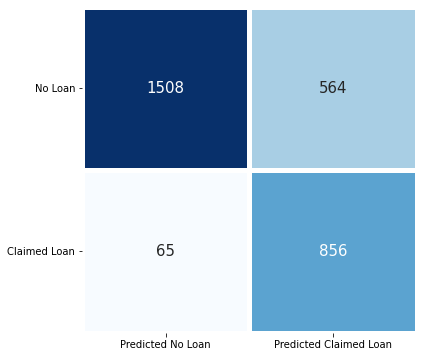

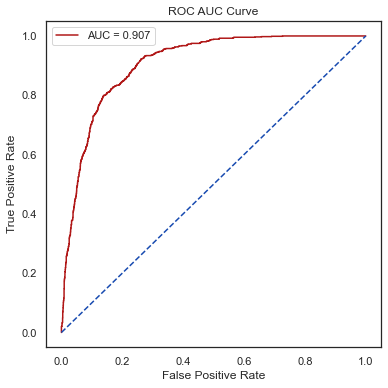

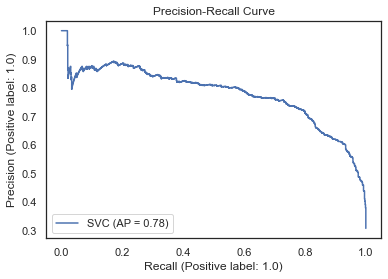

In [ ]:
classifier = SVC(C =0.01, kernel = 'poly', degree=6,
                     random_state = 20, probability = True)
print('--------- Result for SVM on test data ---------')
print('')
fn.model_fit_plot(x_train, y_train, x_test, y_test, classifier)

## 5-8- Models comparision and result

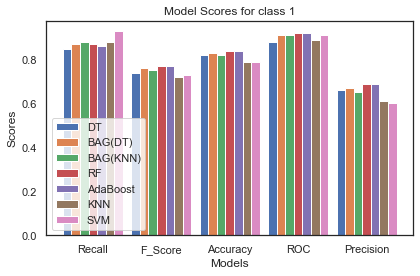

In [ ]:
labels = ['Recall', 'F_Score', 'Accuracy', 'ROC', 'Precision']
models = ['DT', 'BAG(DT)', 'BAG(KNN)', 'RF', 'AdaBoost', 'KNN', 'SVM']
arr = [
    [0.85,  0.74, 0.82, 0.88, 0.66],
    [0.87, 0.76, 0.83, 0.91, 0.67],
    [0.88, 0.75, 0.82, 0.91, 0.65],
    [0.87, 0.77, 0.84, 0.92, 0.69],
    [0.86, 0.77, 0.84, 0.92, 0.69],
    [0.88, 0.72, 0.79, 0.89, 0.61],
    [0.93, 0.73, 0.79, 0.91, 0.6],
]

x = np.arange(len(labels))
width = 0.125 

bars = []
for i in range(7):
    bars.append(plt.bar(x + (width * i), arr[i], width, label=models[i]))

plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Model Scores for class 1")
plt.xticks(x + 3 * width, labels)
plt.legend(loc=3)
plt.tight_layout()

plt.show()

## Final Results:
#### SVM classifier with below hyperparameters is best model for this dataset:
#### C = 0.01
#### kernel = poly
#### degree = 6
#### here is the results:

In [ ]:
measures_svm = ['recall']
classifier = SVC(C =0.01, kernel = 'poly', degree=6,
                     random_state = 20, probability = True)
svm_measures = fn.model_fit(x_train, y_train, x_test,
                                y_test, classifier, measures_svm)

In [ ]:
svm_measures

{'train': {'recall': 91.17}, 'test': {'recall': 92.94}}

# **********************************************************************
# Sample code 4: Twitter Dynamic Communities Evolution Analisys
# **********************************************************************

In [1]:
import os
import shutil
import datetime
file_name = os.path.basename(globals()['__vsc_ipynb_file__'])

# Get the current date and time
now = datetime.datetime.now()
timestamp = now.strftime('%Y%m%d%H%M')

# Construct the filename for the new file
new_filename = f"{os.path.splitext(file_name)[0]}_{timestamp}{os.path.splitext(file_name)[1]}"

# Copy the original file to the new file path
shutil.copy(file_name, new_filename)

'thesis_202401101343.ipynb'

In [2]:
import os
import datetime
import shutil
import glob
import dask.dataframe as dd
import numpy as np
import pandas as pd
import igraph as ig
from igraph import Graph
import winsound
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import openpyxl
import pickle
from hazm import *
import re
import csv
from datetime import datetime
# import polars as pl
# import louvain
# import leidenalg
# import networkx as nx
# from typing import List

# FUNCTION DEFINITION START

In [3]:
normalizer = Normalizer()

In [4]:

valid_character = [u"آ", u"ئ", u"ا", u"ب", u"ت", u"ث", u"ج", u"ح", u"خ", u"د",
                        u"ذ", u"ر", u"ز", u"س", u"ش", u"ص", u"ض", u"ط", u"ظ", u"ع",
                        u"غ", u"ف", u"ق", u"ل", u"م", u"ن", u"ه", u"چ", u"ژ", u"ک",
                        u"گ", u"ی", u"ی", u" ", u"و", u"پ", u"\u200c"]

dic_incorrect_to_correct = {u"ٱ": u"آ", u"ﺁ": u"آ",
                                 u"ﺌ": u"ئ", u"ﺋ": u"ئ",
                                 u"ﺍ": u"ا", u"ﺎ": u"ا",
                                 u"ﺏ": u"ب", u"ﺒ": u"ب", u"ﺐ": u"ب", u"ﺑ": u"ب",
                                 u"ﺕ": u"ت", u"ﺗ": u"ت", u"ﺖ": u"ت", u"ﺘ": u"ت",
                                 u"ﺚ": u"ث", u"ﺛ": u"ث", u"ﺜ": u"ث",
                                 u"ﺞ": u"ج", u"ﺠ": u"ج", u"ﺟ": u"ج", u"ﺝ": u"ج",
                                 u"ﺤ": u"ح", u"ﺣ": u"ح", u"ﺢ": u"ح",
                                 u"ﺨ": u"خ", u"ﺧ": u"خ", u"ﺦ": u"خ",
                                 u"ﺩ": u"د", u"ﺪ": u"د",
                                 u"ﺬ": u"ذ", u"ﺫ": u"ذ",
                                 u"ﺭ": u"ر", u"ﺮ": u"ر",
                                 u"ﺰ": u"ز", u"ﺯ": u"ز",
                                 u"ﺲ": u"س", u"ﺱ": u"س", u"ﺴ": u"س", u"ﺳ": u"س",
                                 u"ﺵ": u"ش", u"ﺶ": u"ش", u"ﺸ": u"ش", u"ﺷ": u"ش",
                                 u"ﺺ": u"ص", u"ﺼ": u"ص", u"ﺻ": u"ص",
                                 u"ﺿ": u"ض", u"ﻀ": u"ض", u"ﺽ": u"ض",
                                 u"ﻂ": u"ط", u"ﻄ": u"ط", u"ﻃ": u"ط",
                                 u"ﻈ": u"ظ", u"ﻇ": u"ظ",
                                 u"ﻊ": u"ع", u"ﻌ": u"ع", u"ﻋ": u"ع", u"ﻉ": u"ع",
                                 u"ﻎ": u"غ", u"ﻐ": u"غ", u"ﻏ": u"غ", u"ﻍ": u"غ",
                                 u"ﻑ": u"ف", u"ﻒ": u"ف", u"ﻔ": u"ف", u"ﻓ": u"ف",
                                 u"ﻕ": u"ق", u"ﻖ": u"ق", u"ﻘ": u"ق", u"ﻗ": u"ق",
                                 u"ﻝ": u"ل", u"ﻞ": u"ل", u"ﻠ": u"ل", u"ﻟ": u"ل",
                                 u"ﻡ": u"م", u"ﻢ": u"م", u"ﻤ": u"م", u"ﻣ": u"م",
                                 u"ﻦ": u"ن", u"ﻥ": u"ن", u"ﻨ": u"ن", u"ﻧ": u"ن",
                                 u"ە": u"ه", u"ھ": u"ه", u"ﻬ": u"ه", u"ﻩ": u"ه", u"ﻫ": u"ه",
                                 u"ﻪ": u"ه",
                                 u"ﮤ": u"ه",
                                 u"ۀ": u"ه", u"ة": u"ه", u"ہ": u"ه",
                                 u"ۆ": u"و", u"ﻭ": u"و", u"ﻮ": u"و", u"ۊ": u"و", u"ؤ": u"و",
                                 u"ﭙ": u"پ", u"ﭘ": u"پ", u"ﭗ": u"پ",
                                 u"ﭻ": u"چ", u"ﭽ": u"چ", u"ﭼ": u"چ",
                                 u"ﮊ": u"ژ",
                                 u"ﻛ": u"ک", u"ﻛ": u"ک", u"ﮏ": u"ک", u"ﮑ": u"ک", u"ﮐ": u"ک",
                                 u"ك": u"ک",
                                 u"ڪ": u"ک",
                                 u"ﻚ": u"ک", u"ګ": u"ک", u"ﻜ": u"ک",
                                 u"ﮓ": u"گ", u"ﮒ": u"گ", u"ﮕ": u"گ", u"ﮔ": u"گ",
                                 u"ﻱ": u"ی", u"ﻲ": u"ی", u"ﯾ": u"ی", u"ﻰ": u"ی", u"ﻴ": u"ی",
                                 u"ﻯ": u"ی",
                                 u"ﻳ": u"ی",
                                 u"ﯼ": u"ی", u"ﯽ": u"ی", u"ﯿ": u"ی", u"ي": u"ی", u"ى": u"ی",
                                 u"ے": u"ی",
                                 u"ێ": u"ی",
                                 u"ې": u"ی",
                                 u"ّ": u"",  # تشدید
                                 u"\u2009": u" ", u"\u200a": u" ", u"\u00a0": u" ",  # space \u00a0
                                 u"\u200e": u"\u200c", u"\u2029": u"\u200c"  ,# halfspace
                                u"\u200c":' '
                                 }



In [5]:
def clean_character( text):
    """
    متن را تبدیل به لیستی از کاراکتر می‌کند و تک تک آنها را اصلاح می‌کند در آخر کاراکترها را بهم چسبنده تا متن تمیز شده و کامل بدست آید
    :param text: متن ورودی
    :return: متن تمیز شده و تعداد کاراکترهایی که تمیز شده
    """
    if isinstance(text, bytes):
        text = text
    number_of_edits = 0
    text = re.sub("\s\s+", " ", text).strip()
    list_char = list(text)

    for index, val in enumerate(list_char):
        if val in dic_incorrect_to_correct:
            list_char[index] = dic_incorrect_to_correct[val]
            number_of_edits += 1
    output = ('').join(list_char)
    return output, number_of_edits

In [6]:
def clean_text( text_or_list):
    """
    در این تابع علاوه بر اصلاح کاراکترها به فرم استاندارد، تمامی کاراکترهای غیر الفبای فارسی و اعداد و همچنین نقطه و نیمفاصله حذف می‌شوند
    :param text_or_list: ورودی یک متن یا لیستی از متن هست
    :return: خروجی متن تمیزشده است
    """
    if not type(text_or_list) == list:
        if isinstance(text_or_list, str):
            text_or_list = text_or_list
        text_or_list = normalizer.normalize(text_or_list)
        regex = u"[^" + ('').join(valid_character) + u"]"
        clean_text, _ = clean_character(text_or_list)
        clean_text = re.sub(regex, " ", clean_text)
        clean_text = re.sub("\s\s+", " ", clean_text).strip()

        return clean_text
    if type(text_or_list) == list:
        clean_list_names = []
        regex = u"[^" + ("").join(valid_character) + u"]"
        for name in text_or_list:
            name = normalizer.normalize(name)
            name_unicode = name
            if isinstance(name, str):
                name_unicode = name

            clean_name, _ = clean_character(name_unicode)
            clean_name = re.sub(regex, " ", clean_name)
            clean_name = re.sub("\s+", " ", clean_name).strip()
            if clean_name.strip() != "":
                clean_list_names.append(clean_name.strip())

        update_clean_list_names = [x for x in clean_list_names if x]
        return update_clean_list_names.split()

In [7]:
f = open('stopwords.txt','r', encoding='utf-8')
stopwords = [f.strip() for f in f.readlines()]

In [8]:
def time_split(df,start,duration_days, overlap_days, steps):
    from datetime import datetime, timedelta
    start_time = datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
    lenght = timedelta(days=duration_days)
    step_df = []
    for step in range(steps):
        step_begin = start_time + (step * lenght) - (step * timedelta(days=overlap_days))
        step_end = step_begin + timedelta(days=duration_days)
        step_begin = step_begin.strftime('%Y-%m-%d %H:%M:%S')
        step_end = step_end.strftime('%Y-%m-%d %H:%M:%S')
        print("from", step_begin, "to", step_end)
        condition = ((df['pubdate'] >= step_begin) & (df['pubdate'] < step_end))
        print(len(df[condition]))
        step_df.append(df[condition])
    return step_df

In [9]:
# Filter edges that their weights are more than threshold

def filter_weight(df_edges_input, threshold):

    df_edges = df_edges_input.copy()
    
    df_edges['key'] = [(str(x[0]) + str(x[1])) for x in np.sort(df_edges[['edge_source','edge_target']].values,axis=1)]

    counts = df_edges.groupby('key')['key'].size()
    to_keep = counts[counts > threshold].index

    # Add edge column
    df_edges['edge'] = 0 

    # Get boolean array of duplicates
    duplicated = df_edges['key'].duplicated() 

    # Assign values
    df_edges.loc[~duplicated, 'edge'] = 1

    # Set edge to 1 for rows to keep  
    df_edges.loc[~df_edges['key'].isin(to_keep), 'edge'] = 0

    # Set edge to 0 for edge_target=0
    df_edges.loc[df_edges['edge_target']==0, ['edge']] = 0

    # Set edge to 0 for self-loop edges
    df_edges.loc[(df_edges['edge_source'] == df_edges['edge_target']), ['edge']] = 0

    # Remove key column
    df_edges = df_edges.drop(columns =['key'])

    return df_edges

In [20]:
import networkx as nx
import pandas as pd

# Function to create a NetworkX graph from a pandas DataFrame
def create_graph_nx(df_edges):
    # Dictionary to map IDs to indices
    id_to_index = {}
   
    # Create a directed graph
    g = nx.DiGraph()

    desc = dict()
   
    c = 1
    # Iterate over each row in the DataFrame
    for i, e in df_edges.iterrows():
        # Get the source and target nodes
        source = e['edge_source']
        target = e['edge_target']

        # Get the description and publication date
        description = e['description']
        pubdate = e['pubdate']
       
        if source in desc.keys():
            desc[source] += (" " + description)
        else:
            desc[source] = description

        if target != 0 and source != target:
            # Add the source node to the graph if it doesn't exist
            if source not in id_to_index:
                id_to_index[source] = len(id_to_index)
                g.add_node(source)
                g.nodes[source]['user_id'] = source
                g.nodes[source]['description'] = ''
                print(str(len(df_edges) - c) + " " + str(pubdate) + " " * 50, end="\r")
           
            # Add the target node to the graph if it doesn't exist
            if target not in id_to_index:
                id_to_index[target] = len(id_to_index)
                g.add_node(target)
                g.nodes[target]['user_id'] = target
                g.nodes[target]['description'] = ''
                print(str(len(df_edges) - c) + " " + str(pubdate) + " " * 50, end="\r")
           
            # Format the publication date
            edge_pubdate = str(pubdate)[:4] + str(pubdate)[5:7] + str(pubdate)[8:10] + str(pubdate)[11:13] + str(pubdate)[14:16] + str(pubdate)[17:19]
            
            # Add the edge to the graph
            if g.has_edge(source, target):
                g.edges[(source, target)]['weight'] +=1                
            else:
                g.add_edge(source, target, weight=1, pubdate=edge_pubdate)
        
        c += 1

    for u in g.nodes:
        if u in desc.keys():
            g.nodes[u]['description'] = desc[u]
    
       
        # Update the description of the source node
    print(f"\n{len(desc)}")
   
    # Return the graph
    print(g)
    return g

In [11]:
# Convert networkx to igraph

def nx_to_ig(graph_nx):

    import igraph as ig
    import networkx as nx

    graph_ig = ig.Graph.from_networkx(graph_nx)

    del graph_ig.vs['_nx_name']

    return graph_ig

In [12]:
#describe a graph
def graph_describe(g):
    import igraph as ig
    from igraph import Graph
    import networkx as nx
    import community as community_louvain

    g_type = str(type(g))[8:14]
    g_u = g.copy()
    g_u.to_undirected()
    print(g_u.summary())
    
    if g_type == "igraph":
        vscount = g.vcount()
        print(f'Number of vertices: {vscount:,d}')
        escount = g.ecount()
        print(f'Number of edges: {escount:,d}')
        avg_deg = ig.mean(g.degree())
        print(f'Average degree: {avg_deg:0.2f}')
        min_degree = min(g.degree())
        print(f'Minmum degree: {min_degree:,d}')
        max_degree = max(g.degree())
        print(f'Maximum degree: {max_degree:,d}')
        components_num = len(g.connected_components(mode="weak"))
        print(f'Number of component: {components_num:,d}')
        louvain_comm_num = len(g_u.community_multilevel())
        print(f'Number of communities(Louvain): {louvain_comm_num:,d}')
        vsatt = g.vs.attributes()
        print(f'Graph vertices attributes: {vsatt}')
        esatt = g.es.attributes()
        print(f'Graph edges attributes: {esatt}')
    else:
        vscount = g.number_of_nodes()
        print(f'Number of vertices: {vscount:,d}')
        escount = g.number_of_edges()
        print(f'Number of edges: {escount:,d}')
        avg_deg = sum(d for n, d in g.degree()) / g.number_of_nodes()
        print(f'Average degree: {avg_deg:0.2f}')
        min_degree = min(g.degree(), key=lambda x: x[1])[1]
        print(f'Minmum degree: {min_degree:,d}')
        max_degree = max(g.degree(), key=lambda x: x[1])[1]
        print(f'Maximum degree: {max_degree:,d}')
        components_num = nx.number_connected_components(g)
        print(f'Number of component: {components_num:,d}')
        partition = community_louvain.best_partition(g)
        louvain_comm_num = max(partition.values()) + 1
        print(f'Number of communities(Louvain): {louvain_comm_num:,d}')
        vsatt = list(list(g.nodes(data=True))[0][1].keys())
        print(f'Graph vertices attributes: {vsatt}')
        esatt = list(list(g.edges(data=True))[0][2].keys())
        print(f'Graph edges attributes: {esatt}')

In [13]:
def select_giant_component(g):
    # Get the components of the graph
    components = g.components(mode="weak")

    # Find the component with the largest number of vertices
    largest_component = max(components, key=len)

    # Extract the giant component
    giant_component = g.subgraph(largest_component)
    
    return giant_component

In [14]:
def convert_communities(communities):
    community_assignments = [0] * sum(len(c) for c in communities)
    for i, community in enumerate(communities):
        for node in community:
            community_assignments[node] = i
    return community_assignments


In [15]:
def crr(graph, p, steps):
    # Initialize E' and i
    E_prime = set()

    # Calculate P
    P = p * graph.ecount()

    # Calculate betweenness centrality and sort edges
    edge_betweenness = graph.edge_betweenness()
    edges_sorted = sorted(graph.es, key=lambda e: -edge_betweenness[e.index])

    # Add edges to E_prime until its size is P
    i = 0
    while len(E_prime) < round(P):
        e = edges_sorted[i]
        E_prime.add(e)
        i += 1

    # Perform the edge swapping steps times
    for _ in range(steps):
        # Pick random edges e1 from E' and e2 from E-E_prime
        e1 = np.random.choice(list(E_prime))
        u = e1.source
        v = e1.target
        e2 = np.random.choice(list(set(graph.es) - E_prime))
        x = e2.source
        y = e2.target


        # Calculate dis(a) and d1, d2
        graph_prime = graph.subgraph_edges(E_prime, delete_vertices=False)
        dis = lambda a: -graph.degree(a) * p + graph_prime.degree(a)
        d1 = abs(dis(u) - 1) + abs(dis(v) - 1) - (abs(dis(u)) + abs(dis(v)))
        d2 = abs(dis(x) + 1) + abs(dis(y) + 1) - (abs(dis(x)) + abs(dis(y)))

        # Swap edges if d1 + d2 < 0
        if d1 + d2 < 0:
            E_prime.remove(e1)
            E_prime.add(e2)

    # Return reduced graph
    return graph.subgraph_edges(E_prime, delete_vertices=True)

In [16]:
def bm2(G, p):# Old
    # phase 1
    E = [i for i in G.es]
    b = [ round(p * i) for i in G.degree()]

    # Calculate the initial selected edges
    E_m = []
    G_prime_deg = [0] * len(G.degree())
    i = 0
    for e in G.es:
        i += 1
        print(f"Calculating E_m: edge {i}", end = "\r")
        u = e.source
        v = e.target
        if G_prime_deg[u] < b[u] and G_prime_deg[v] < b[v]:
            E_m.append(e)
            G_prime_deg[G.vs[u].index] += 1
            G_prime_deg[G.vs[v].index] += 1

    E_star = [i for i in E if i not in E_m]
   
    # phase 2
    # Calulate dis(u)
    dis_func = lambda v: -G.degree(v) * p + G_prime_deg[v.index]
    dis = {i : dis_func(i) for i in G.vs}

    # do vertices classification
    A, B = [[], []]
    i = 0
    for u in G.vs:
        i += 1
        if dis[u] <= -0.5:
            A.append(u)
        elif -0.5 < dis[u] <0:
            B.append(u)

    # Calculate G_star edges list
    W = []
    G_star_e = []
    i = 0
    for e in E_star.copy():
        i += 1
        u = G.vs[e.source]
        v = G.vs[e.target]     
        gain1 = round(abs(dis[u]) + 2 * abs(dis[v]) - abs(1 + dis[u]) - 1, 2)
        gain2 = round(abs(dis[v]) + 2 * abs(dis[u]) - abs(1 + dis[v]) - 1, 2)
        if u in A and v in B and gain1 >= 0:
            W.append(gain1)
            G_star_e.append((e.source, e.target))
        elif u in B and v in A and gain2 >= 0:
            W.append(gain2)
            G_star_e.append((e.target, e.source))
        else:
            E_star.remove(e)

    # Create bipartite graph
    G_star = G.subgraph_edges(E_star, delete_vertices = True)

    G_star.es['gain'] = W

    # Select Supplementary edges from bipartite graph
    E_BP = []
    Q = sorted(G_star.es, key = lambda i: i['gain'], reverse=True)
    iteration = 1
    while len(Q):
        print("----- Iteration", iteration, "-----", len(Q), 30 * " ", end="\r")
        e = Q.pop(0)
        a = e.source
        b = e.target
        if G_star.vs[a] not in A:
            a, b = b, a
        source_adj = [edge for edge in Q if edge.source == a] if G_star.vs[a] in A else [edge for edge in Q if edge.target == a]
        if e['gain'] !=0:
            E_BP.append(e)
            a_edge = G.vs.find(user_id = G_star.vs[a]['user_id'])
            dis[a_edge] += 1
            if -1 < dis[a_edge] <= -0.5:
                for e_prime in source_adj:
                    x_temp = e_prime.target if G_star.vs[a] in A else e_prime.source
                    gain = round(abs(dis[a_edge]) + 2 * abs(dis[G.vs[x_temp]]) - abs(1 + dis[a_edge]) -1, 3)
                    e_prime['gain'] = gain
                    if gain > 0:
                        Q = sorted(sorted(Q), key = lambda i: i['gain'], reverse=True)
                    else:
                        Q.remove(e_prime)
            elif dis[a_edge] > -0.5:
                for e_prime in source_adj:
                    Q.remove(e_prime)
        iteration += 1
    
    E_BP = [i for i in E_BP if i['gain'] != 0]

    E_prime = sorted(E_m + E_BP)
    G_prime = G.subgraph_edges(E_prime, delete_vertices = True)

    return G_prime

In [17]:
def bm2_2(G, p):
    import heapq
    # phase 1

    b = {v: round(p * G.degree(v)) for v in G.vs}

    # Calculate the initial selected edges
    E_m = set()
    G_prime_deg = {v: 0 for v in G.vs}
    i = 0
    for e in G.es:
        u = G.vs[e.source]
        v = G.vs[e.target]
        if G_prime_deg[u] < b[u] and G_prime_deg[v] < b[v]:
            E_m.add(e)
            G_prime_deg[u] += 1
            G_prime_deg[v] += 1

    E_star = set(G.es) - E_m

    G_b_match = G.subgraph_edges(E_m, delete_vertices = False)
   

    # phase 2
    # Calulate dis(u)
    dis_func = lambda v: G_b_match.degree(v) - p * G.degree(v)
    dis = {v : dis_func(v) for v in G.vs}

    # do vertices classification
    A, B = [set(), set()]
    i = 0
    for u in G.vs:
        i += 1
        if dis[u] <= -0.5:
            A.add(u)
        elif -0.5 < dis[u] <0:
            B.add(u)

    # Calculate G_star edges list
    W = []
    i = 0
    for e in E_star.copy():
        i += 1
        u = G.vs[e.source]
        v = G.vs[e.target]     
        gain1 = round(abs(dis[u]) + 2 * abs(dis[v]) - abs(1 + dis[u]) - 1, 2)
        gain2 = round(abs(dis[v]) + 2 * abs(dis[u]) - abs(1 + dis[v]) - 1, 2)
        if u in A and v in B and gain1 > 0:
            W.append(gain1)
        elif u in B and v in A and gain2 > 0:
            W.append(gain2)
        else:
            E_star.remove(e)
    

    G_star = G.subgraph_edges(E_star, delete_vertices = True)
    G_star.es['gain'] = W

    # Create bipartite
    E_BP = set()
    Q = [(-e['gain'], e) for e in G_star.es]
    heapq.heapify(Q)
    iteration = 1
    while Q:
        print("----- Iteration", iteration, "-----", len(Q))#, 50 * " ", end="\r")
        item = heapq.heappop(Q)
        gn, e = item[0], item[1]
        print(f"gain= {-gn}")
        a = e.source
        b = e.target
        if G_star.vs[a] not in A:
            a, b = b, a
        source_adj = set([item[1] for item in Q if item[1].source == a] if G_star.vs[a] in A else [item[1] for item in Q if item[1].target == a])
        target_adj = set([item[1] for item in Q if item[1].target == b] if G_star.vs[a] in A else [item[1] for item in Q if item[1].source == b])
        (Q.remove((-tar_adj['gain'],tar_adj)) for tar_adj in target_adj)
        heapq.heapify(Q)
        E_BP.add(e)
        a_vertex = G.vs.find(user_id = G_star.vs[a]['user_id'])
        dis[a_vertex] += 1
        print(f"dis[a]= {dis[a_vertex]}")
        if -1 < dis[a_vertex] <= -0.5:
            for e_prime in source_adj:
                x_temp = e_prime.target if G_star.vs[a] in A else e_prime.source
                old_gain = G_star.es[e_prime.index]['gain']
                gain = round(abs(dis[a_vertex]) + 2 * abs(dis[G.vs[x_temp]]) - abs(1 + dis[a_vertex]) -1, 3)
                e_prime['gain'] = gain
                Q[Q.index((-old_gain, e_prime))] = (-gain, e_prime)
                heapq.heapify(Q)
                if gain <= 0:
                    Q.remove((-e_prime['gain'], e_prime))
                    heapq.heapify(Q)
        elif dis[a_vertex] > -0.5:
            for e_prime in source_adj:
                Q.remove((-e_prime['gain'], e_prime))
                heapq.heapify(Q)
        iteration += 1
    
    E_BP = {i for i in E_BP if i['gain'] != 0}

    E_prime = sorted(E_m.union(E_BP))
    G_prime = G.subgraph_edges(E_prime, delete_vertices = True)

    return G_prime

In [18]:
def louvain_communities(graph):
    user_ids = [node['user_id'] for node in graph.vs]
    communities_by_index = graph.community_multilevel()
    communities = []
    for community in list(communities_by_index):
        user_id_community = []
        for node_index in community:
            user_id_community.append(user_ids[node_index])
        communities.append(user_id_community)
    graph.vs["community"] = communities_by_index.membership
    return communities

In [19]:
def plot_communities(graph, communities):
    undirectd_graph = graph
    undirectd_graph.to_undirected()
    degree = graph.degree()
    visual_style = {
        "vertex_size": 10, # [int(x)+20 for x in degree],
        "vertex_color": vertex_colors,
        "vertex_label": None, # g.vs['label'],
        "vertex_label_size": 1,
        "vertex_label_color": "white",
        "edge_width": 0.5,
        "edge_color": "gray",
        "edge_arrow_size": 0.5,
        "edge_arrow_width": 1,
        "layout": graph.layout("fr"),
        "mark_groups" : True,
        "bbox": (3000, 2500),
        "margin": 100, 
    }

    ig.plot(undirectd_graph, 'communities.svg', **visual_style)
    # ig.plot(communities, "communities.svg", **visual_style)

# FUNCTION DEFINITION END

In [179]:
# drop unwanted columns and aggregate all files for creating network
cols_to_select = ['tweetid', 'description', 'pubdate', 'source', 
                  'tweet_type', 'in_reply_to_user_id', 'retweeted_user_id', 
                  'user_id', 'user_verified', 'in_reply_to_status_id', 
                  'user_friends_count', 'user_followers_count'
                  ]

In [186]:
# Aggrigate All 3184 csv files in All folder
folder_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\Soltani'

# Select columns used for aggregation
cols_to_select = {'user_id':np.int64, 'tweetid':np.int64, 'description':str, 'in_reply_to_user_id':np.int64, 'in_reply_to_status_id':np.int64, 
                  'retweeted_user_id':np.int64, 'retweeted_status_id':np.int64, 'pubdate':str, 'tweet_type':str, 
                  'user_verified':np.float64 
}

pd.set_option('display.float_format', None)

# get a list of CSV files in the folder
file_names = glob.glob(os.path.join(folder_path, "*.csv"))

# sort the list of files by date modified, from oldest to newest
file_names = sorted(file_names, key=os.path.getmtime)

# Use a generator expression to read each CSV file with only the specified columns
df_from_each_file = (dd.read_csv(f, usecols=cols_to_select.keys(), assume_missing=True, dtype=cols_to_select) for f in file_names)

df_list = list(df_from_each_file)

# Concatenate the dataframes
concatenated_df = dd.concat(df_list)

# Compute the final dataframe
aggregated_df_description = concatenated_df.compute()

In [187]:
aggregated_df_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12827123 entries, 0 to 82842
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tweetid                int64  
 1   description            object 
 2   pubdate                object 
 3   tweet_type             object 
 4   in_reply_to_user_id    int64  
 5   in_reply_to_status_id  int64  
 6   retweeted_user_id      int64  
 7   retweeted_status_id    int64  
 8   user_id                int64  
 9   user_verified          float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.1+ GB


In [188]:
# Remove duplicate tweets based on tweetid
aggregated_df_description = aggregated_df_description.drop_duplicates(subset ="tweetid", keep = "first", inplace = False)

In [189]:
aggregated_df_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6570133 entries, 0 to 82842
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tweetid                int64  
 1   description            object 
 2   pubdate                object 
 3   tweet_type             object 
 4   in_reply_to_user_id    int64  
 5   in_reply_to_status_id  int64  
 6   retweeted_user_id      int64  
 7   retweeted_status_id    int64  
 8   user_id                int64  
 9   user_verified          float64
dtypes: float64(1), int64(6), object(3)
memory usage: 551.4+ MB


In [190]:
# Sort by tweetid (pubdate)
aggregated_df_description = aggregated_df_description.sort_values(by='tweetid')

In [28]:
# convert pubdate type from string to datetime
aggregated_df_description['pubdate'] = pd.to_datetime(aggregated_df_description['pubdate'])

In [29]:
# replace Nan values of column user_verified with 0.0
aggregated_df_description['user_verified'] = aggregated_df_description['user_verified'].fillna(0.0)


In [31]:
df = aggregated_df_description

In [32]:
df = df.reset_index(drop=True)

In [35]:
# save the DataFrame to disk in .feather format
feather.write_feather(aggregated_df_description, 'aggregated_df_description.feather')

In [36]:
import winsound
winsound.Beep(2000, 350)

In [39]:
df['description'] = df['description'].apply(clean_text)

In [42]:
# aggregated_df_description_clean = df

In [43]:
# save the DataFrame to disk in .feather format
feather.write_feather(aggregated_df_description_clean, 'aggregated_df_description_clean.feather')

In [44]:
# save the DataFrame to disk with compression
aggregated_df_description_clean.to_csv('aggregated_df_description_clean.csv', index=False)

# READ AGGREGATED FILE

In [45]:
# specify the path of the .feather file
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\aggregated_df_description.feather'

# read the dataframe from the .feather file
aggregated_df_description = pd.DataFrame(feather.read_feather(file_path))

In [46]:
aggregated_df_description_clean.info()

In [47]:
selected_columns = ['tweetid', 'pubdate', 'user_id']
print(aggregated_df_description_clean.loc[:10, selected_columns])

In [48]:
df_twitter = aggregated_df_description_clean

In [49]:
df_twitter = df_twitter[(df_twitter['pubdate'] > pd.Timestamp("2023-03-17 00:00:00")) & (df_twitter['pubdate'] < pd.Timestamp("2023-03-18 00:00:00"))]


In [52]:
# save the DataFrame to disk with compression
df_twitter.to_csv('df_twitter.csv', index=False)

In [53]:
winsound.Beep(2000, 350)

In [54]:
# Draw tweets frequency bar chart during time
df = aggregated_df_description
# Set the bin size (in days)
bin_size = 7

# Define the start and end dates for the bins
start_date = df['pubdate'].min()
end_date = df['pubdate'].max()

# Generate a list of bin edges
bin_edges = pd.date_range(start=start_date, end=end_date, freq=f'{bin_size}D')

# Calculate the tweet counts per bin
tweet_counts, _ = pd.cut(df['pubdate'], bins=bin_edges, include_lowest=True, right=False, retbins=True)[0:2]
tweet_counts = pd.Series(tweet_counts).value_counts().sort_index().values

# Set the plot title and axis labels
fig, ax = plt.subplots(figsize=(15, 6))

# # Add a margin at the top of the plot
# fig.subplots_adjust(top=2)

ax.set_title(f'Tweet counts per {bin_size}-day period')
ax.set_xlabel('Date')
ax.set_ylabel('Tweet count')

# Set the x-axis tick labels to show only the date (not the time)
ax.set_xticks(bin_edges)
ax.set_xticklabels([d.date() for d in bin_edges], rotation=90, ha='right', fontsize=7)

# Set the width of the bars
width = 0.75 * (bin_edges[1] - bin_edges[0]).days

# Create a bar chart of the tweet counts per bin
bars = ax.bar(bin_edges[:-1], tweet_counts, width=width, align='edge')

# Add text labels at the top of each bar
for bar, count in zip(bars, tweet_counts):
    if count<4200000:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), '  {:,}'.format(count), 
                ha='center', va='bottom', rotation=90, fontsize=7)
    else:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), '{:,}'.format(count), 
                ha='center', va='top', rotation=90, fontsize=7, color='white')

# Set the y-axis ticks to show every 500,000 tweets
ax.yaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

# Show the plot
plt.show()

In [55]:
# Count the number of True and False values in the user_verified column

df = aggregated_df_description
verified_counts = df['user_verified'].value_counts()

# Create a bar chart of the verified user counts
fig, ax = plt.subplots()

bars = ax.bar(['Not verified', 'Verified'], verified_counts)

# Add text labels at the top of each bar
for bar, count in zip(bars, verified_counts):
    if count<100000000:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()*10, '  {:,}'.format(count), 
                ha='center', va='bottom', rotation=0, fontsize=10)
    else:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.98, '{:,}'.format(count), 
                ha='center', va='top', rotation=0, fontsize=10, color='white')
ax.set_title('Distribution of User Verification')
ax.set_xlabel('Verification Status')
ax.set_ylabel('Number of Users')

plt.show()

In [56]:
df = df_twitter

In [57]:
# Add edge source and edge target to df

# Add the edge source column to the original DataFrame
df['edge_source'] = df['user_id']

# Use np.select() to create the edge target column based on multiple conditions
conditions = [
    df['tweet_type'] == 'general',
    df['tweet_type'].isin(['reply', 'quote']),
    df['tweet_type'] == 'retweet'
]
choices = [
    0,
    df['in_reply_to_user_id'],
    df['retweeted_user_id']
]
df['edge_target'] = np.select(conditions, choices, default=0)

In [62]:
# Create edge list

edges = df[['edge_source', 'edge_target', 'tweetid', 'description', 'pubdate']] 

# Add weight column to edges dataframe using .loc accessor
edges.loc[:, 'weight'] = 1

In [64]:
# save the DataFrame to disk in csv format
edges.to_csv('edges_clean.csv', index=False)

In [65]:
# save the DataFrame to disk in .feather format
feather.write_feather(edges, 'edges.feather')

In [21]:
import winsound
winsound.Beep(2000, 350)

# READ EDGES FILE

In [19]:
# specify the path of the .feather file
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\edges_clean.feather'
edges_backup = pd.DataFrame(feather.read_feather(file_path))

In [68]:
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\edges.csv'
edges_backup = pd.read_csv(file_path)

In [20]:
edges = edges_backup.copy()

In [57]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173861977 entries, 0 to 173861976
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   edge_source  int64         
 1   edge_target  int64         
 2   tweetid      int64         
 3   description  object        
 4   pubdate      datetime64[ns]
 5   weight       int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 7.8+ GB


In [64]:
for i,e in edges[:5].iterrows():
    print(i, e['pubdate'])

0 2022-05-13 09:12:01
1 2022-05-13 09:16:45
2 2022-05-13 09:18:08
3 2022-05-13 09:26:26
4 2022-05-13 09:29:30


In [71]:
edges = edges_backup[(edges_backup['pubdate'] > pd.Timestamp("2023-03-17 00:00:00")) & (edges_backup['pubdate'] < pd.Timestamp("2023-03-18 00:00:00"))]

In [73]:
# save the DataFrame to disk in csv format
edges.to_csv('edges_2023-03-17.csv', index=False)

In [74]:
feather.write_feather(edges,'edges_2023-03-17.feather')

In [ ]:
time_edges = time_split(edges,start = "2022-05-13 00:00:00",duration_days = 14, overlap_days = 3, steps = 39)
print([len(item) for item in time_edges])
winsound.Beep(2000, 160)

In [33]:
time_edges[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 119848 entries, 0 to 119847
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   edge_source  119848 non-null  int64         
 1   edge_target  119848 non-null  int64         
 2   tweetid      119848 non-null  int64         
 3   description  119848 non-null  object        
 4   pubdate      119848 non-null  datetime64[ns]
 5   weight       119848 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.4+ MB


In [78]:
# save the DataFrame to disk in .feather format
feather.write_feather(sample_edge, 'sample_edge.feather')

In [79]:
edges.to_csv('edges.csv', index=False)

In [32]:
import winsound
winsound.Beep(2000, 350)

In [21]:
edges_weight = filter_weight(edges, 0)

In [23]:
aggregated_graph_nx = create_graph_nx(edges_weight)

In [25]:
aggregated_graph_ig = nx_to_ig(aggregated_graph_nx)

In [27]:
graph_describe(aggregated_graph_ig)

Number of vertices: 2,108,128
Number of edges: 56,931,162
Average degree: 54.01
Minmum degree: 1
Maximum degree: 168,092
Number of component: 23,447
Number of communities(Louvain): 26,185
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [29]:
aggregated_graph_giant = select_giant_component(aggregated_graph_ig)

In [30]:
graph_describe(aggregated_graph_giant)

Number of vertices: 2,053,415
Number of edges: 56,899,632
Average degree: 55.42
Minmum degree: 1
Maximum degree: 168,092
Number of component: 1
Number of communities(Louvain): 1,969
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [31]:
import pickle
g = aggregated_graph_giant
with open("aggregated_graph_giant.pickle", "wb") as f:
    pickle.dump(g, f)

In [25]:
# time_edges = [filter_weight(time_edges[i], 0) for i in range(len(time_edges))]
for i in range(len(time_edges)):
    time_edges[i] = filter_weight(time_edges[i], 0)
    print("Snapshot weight filter", i, "was completed")
    

Snapshot weight filter 0 was completed
Snapshot weight filter 1 was completed
Snapshot weight filter 2 was completed
Snapshot weight filter 3 was completed
Snapshot weight filter 4 was completed
Snapshot weight filter 5 was completed
Snapshot weight filter 6 was completed
Snapshot weight filter 7 was completed
Snapshot weight filter 8 was completed
Snapshot weight filter 9 was completed
Snapshot weight filter 10 was completed
Snapshot weight filter 11 was completed
Snapshot weight filter 12 was completed
Snapshot weight filter 13 was completed
Snapshot weight filter 14 was completed
Snapshot weight filter 15 was completed
Snapshot weight filter 16 was completed
Snapshot weight filter 17 was completed
Snapshot weight filter 18 was completed
Snapshot weight filter 19 was completed
Snapshot weight filter 20 was completed
Snapshot weight filter 21 was completed
Snapshot weight filter 22 was completed
Snapshot weight filter 23 was completed
Snapshot weight filter 24 was completed
Snapshot w

In [ ]:
# graph_complete_nx = [create_graph_nx(time_edges[i]) for i in range(len(time_edges))]
graph_complete_nx = []
for i in range(len(time_edges)):
    graph_complete_nx.append(create_graph_nx(time_edges[i]))
    print("Snapshot nx graph", i, "was created")

In [41]:
print(graph_complete_nx[38])

DiGraph with 359680 nodes and 2804465 edges


In [ ]:
graph_complete_ig = []
for i in range(len(time_edges)):
     print(i, graph_complete_nx[i])
     graph_complete_ig.append(nx_to_ig(graph_complete_nx[i]))


In [ ]:
for i in range(len(time_edges)):
    print("------- snapshot ", i, "-------")
    graph_describe(graph_complete_ig[i])

In [ ]:
graph_giant_ig[0] = select_giant_component(graph_complete_ig[0])

In [37]:
print(graph_complete_ig[0].vcount(), graph_complete_ig[0].ecount())

54020 81280


In [ ]:
graph_giant_ig = []
for i in range(len(time_edges)):
    graph_giant_ig.append(select_giant_component(graph_complete_ig[i]))
    print(i, graph_giant_ig[i].vcount(), graph_giant_ig[i].ecount())


In [ ]:
Export pickle
for i in range(len(graph_giant_ig)):
    print("Snapshot", i, end=" ")
    g = graph_giant_ig[i]
    with open("graph_giant_ig_" + str(i) + ".pickle", "wb") as f:
        pickle.dump(g, f)
    print("was exported.")

# READ GRAPHS PICKLE FILES

In [ ]:
# Determine location of files
folder_path = 'D:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\graph_giant_ig'

# Get a list of all pickle files in the directory
pickle_files = sorted(glob.glob(os.path.join(folder_path, "*.pickle")))

graph_giant_ig = []
for pickle_file in pickle_files:
    print(pickle_file[70:], end=" ")
    with open(pickle_file, "rb") as f:
        graph_giant_ig.append(pickle.load(f))
    print("was loaded.")

In [56]:
for i in range(len(time_edges)):
    print("------- snapshot ", i, "-------")
    graph_describe(graph_giant_ig[i])

------- snapshot  0 -------
Number of vertices: 43,638
Number of edges: 75,179
Average degree: 3.45
Minmum degree: 1
Maximum degree: 1,752
Number of component: 1
Number of communities(Louvain): 142
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']
------- snapshot  1 -------
Number of vertices: 168,651
Number of edges: 872,490
Average degree: 10.35
Minmum degree: 1
Maximum degree: 13,912
Number of component: 1
Number of communities(Louvain): 550
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']
------- snapshot  2 -------
Number of vertices: 241,150
Number of edges: 1,524,507
Average degree: 12.64
Minmum degree: 1
Maximum degree: 15,416
Number of component: 1
Number of communities(Louvain): 471
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']
------- snapshot  3 -------
Number of vertices: 214,519
Number of edges: 1,313,736
Average degree: 12.25
Minmum degree: 1
Maximum

In [144]:
import winsound
for i in range(19,39):
    print("------- snapshot ", i, "-------")
    g = graph_giant_ig[i]
    dia = g.diameter()
    print("Diameter:", dia)
    winsound.Beep(2000, 100)
    path = g.average_path_length(directed=False)
    print("Average path length", path)
    winsound.Beep(2000, 100)
    coefficient = g.transitivity_undirected()
    print("Global clustering coefficient", coefficient)
    winsound.Beep(2000, 400)

------- snapshot  19 -------
Diameter: 20
Average path length 3.9965805204868667
Global clustering coefficient 0.0018277572771763532
------- snapshot  20 -------


In [47]:
graph_giant_ig[25].vs[92]

igraph.Vertex(<igraph.Graph object at 0x000001C3A89D9940>, 92, {'user_id': 1422470232216645652, 'description': ' امید سحر کی آواز سنو اسلام آباد می امید سحر امید کا سفر شروع اسلام آباد می امید سحر اسلام آباد می امید سحر پاکستان کی شان مریم نواز پر جوش ورکر مضبوط عزم سنو سحر کی بات سنو امید سحر کی بات اسلام آباد می امید سحر اسلام آباد می امید سحر امید سحر پاکستان کی غریب عوام کی آواز مریم نواز مریم نواز اسلام آباد می امید سحر عکس نواز مریم نواز اسلام آباد می امید سحر اسلام آباد کی آواز مریم نواز اسلام آباد می امید سحر عکس نواز شریف اسلام آباد می امید سحر امید سحر امید پاکستان اسلام آباد می امید سحر امید سحر اسلام آباد می امید سحر عکس نواز مریم نواز اسلام آباد می امید سحر پر جوش ورکر مضبوط عزم سنو سحر کی بات سنو امید سحر کی بات اسلام آباد می امید سحر امید سحر کی آواز سنو اسلام آباد می امید سحر امید سحر اسلام آباد می امید سحر امید سحر اسلام آباد می امید سحر عوام کی محبت اسلام آباد می امید سحر ورکرز کی آواز مریم نواز مریم نواز اسلام آباد می امید سحر ذلیل انسان یوتهیا انصاف لیک هوگیا ذلیل ا

In [23]:
graph_describe(graph_giant_ig[1])

Number of vertices: 449,930
Number of edges: 4,584,669
Average degree: 20.38
Minmum degree: 1
Maximum degree: 33,466
Number of component: 1
Number of communities(Louvain): 381
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [21]:
import winsound
winsound.Beep(2000, 350)

In [ ]:
graph_reduce_crr = crr(graph_giant_ig[0], 0.665,499940)

In [52]:
graph_describe(graph_giant_reduce)

Number of vertices: 39,359
Number of edges: 49,994
Average degree: 2.54
Minmum degree: 1
Maximum degree: 1,707
Number of component: 117
Number of communities(Louvain): 252
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [55]:
graph_giant_reduce = select_giant_component(graph_reduce_ig)

In [56]:
graph_describe(graph_giant_reduce)

Number of vertices: 39,112
Number of edges: 49,863
Average degree: 2.55
Minmum degree: 1
Maximum degree: 1,707
Number of component: 1
Number of communities(Louvain): 121
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [30]:
graph_giant_ig[1].es["name"] = range(graph_giant_ig[1].ecount())

In [25]:
graph_giant_ig[0].summary()

'IGRAPH U-W- 43638 75179 -- \n+ attr: description (v), user_id (v), name (e), weight (e)'

In [31]:
graph_giant_ig[1].summary()

'IGRAPH U-W- 449930 4584669 -- \n+ attr: description (v), user_id (v), name (e), weight (e)'

In [ ]:
graph_reduce_snapshot_00 = bm2(graph_giant_ig[0], 0.4)

In [32]:
graph_reduce_bm2_snapshot_26_40000 = bm2(graph_giant_ig[1], 0.01)

In [45]:
graph_describe(graph_reduce_bm2_snapshot_26_40000)

Number of vertices: 35,015
Number of edges: 75,496
Average degree: 4.31
Minmum degree: 1
Maximum degree: 488
Number of component: 2,385
Number of communities(Louvain): 2,540
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight', 'name']


In [48]:
graph_giant_bm2 = select_giant_component(graph_reduce_bm2_snapshot_26_40000)

In [49]:
graph_describe(graph_giant_bm2)

Number of vertices: 29,903
Number of edges: 72,767
Average degree: 4.87
Minmum degree: 1
Maximum degree: 488
Number of component: 1
Number of communities(Louvain): 162
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight', 'name']


In [137]:
import powerlaw
degree_seq_original = graph_giant_ig[1].degree()
degree_seq_reduced = graph_giant_bm2.degree()
fit = powerlaw.Fit(degree_seq_original)
print(f"Gamma for original graph= {fit.alpha}")
fit = powerlaw.Fit(degree_seq_reduced)
print(f"Gamma for reduced graph= {fit.alpha}")

Calculating best minimal value for power law fit
Gamma for original graph= 2.4068750712164713
Calculating best minimal value for power law fit
Gamma for reduced graph= 2.553120622083733


In [141]:
print(max(graph_giant_ig[1].degree()))
print(min(graph_giant_ig[1].degree()))
print(len(graph_giant_ig[1].vs))

33466
1
449930


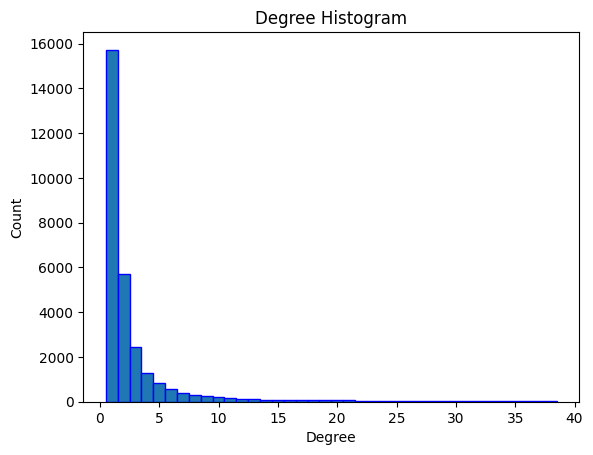

In [56]:
degree_list = graph_giant_bm2.degree()
# Create a histogram plot of the degree distribution
plt.hist(degree_list, bins=range(1, 40), align='left', edgecolor='blue')

# Set the plot attributes
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")

# Show the plot
plt.show()

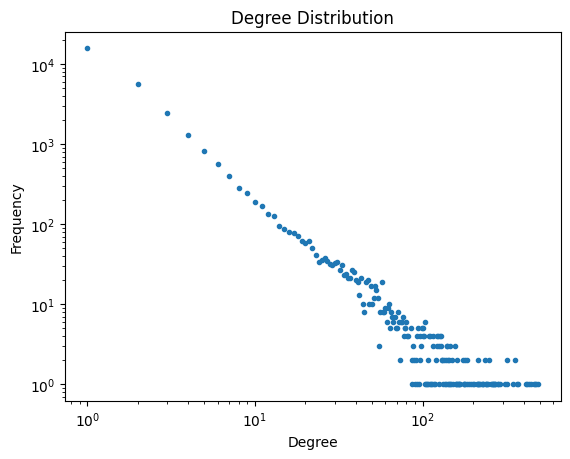

In [51]:
degree_list = graph_giant_bm2.degree()

# Calculate the degree frequency
degree_freq = np.bincount(degree_list)

# Create a log-log scatter plot of the degree distribution
plt.scatter(range(len(degree_freq)), degree_freq, marker='.')
plt.xscale('log')
plt.yscale('log')

# Set the plot attributes
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Show the plot
plt.show()

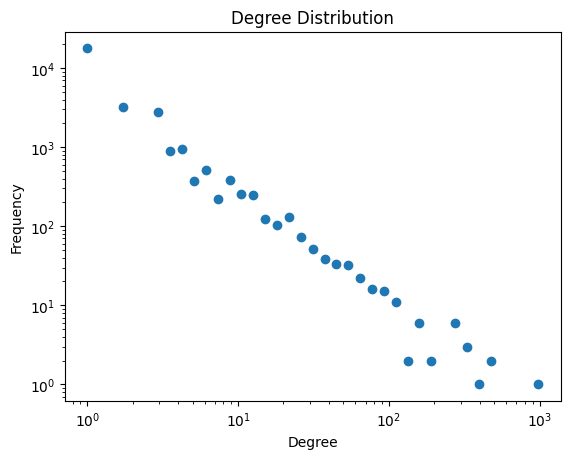

In [36]:
degree_list = graph_giant_bm2.degree()

# Calculate the degree frequency in logarithmic bins
degree_freq, degree_bins = np.histogram(degree_list, bins=np.logspace(np.log10(1), np.log10(max(degree_list) + 1), num=40))

# Create a log-binned plot of the degree distribution
plt.plot(degree_bins[:-1], degree_freq, linestyle='', marker='o')

# Set the plot attributes
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [ ]:
graph_sentiment_nx = create_graph_nx(edges_sentiment)

In [53]:
edges_sentiment.head()

,edge_source,edge_target,tweetid,description,pubdate,weight
81957586,1394947865106132994,1335904794423275520,1636578105060990978,یا خدا الان میخورتمون,2023-03-17 00:00:01,1
81957587,771686329545547777,947924373029171200,1636578108823289857,فراموش تان نمی کنیم برهان الیاسی جوان ساله اهل...,2023-03-17 00:00:01,1
81957588,1434457217974116352,1434457217974116352,1636578108827480064,آقا جانم دیدین این گوشیا خراب میشن تنظیمات کار...,2023-03-17 00:00:01,1
81957589,1574108986730758151,0,1636578108911280128,افشای فساد و تجارت خانوادگی علی خامنه ای و برا...,2023-03-17 00:00:01,1
81957590,775440711453990913,0,1636578109670432772,صبح که از خواب پاشدم این پیامک برام اومده بود ...,2023-03-17 00:00:02,1


In [145]:
edges_complete = edges.copy()

In [146]:
edges_complete = edges_complete[:50000]

In [147]:
edges_complete['edge'] = 1
edges_complete.loc[edges_complete['edge_target'] == 0, 'edge'] = 0

In [148]:
edges_complete[edges_complete['edge'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 44371 entries, 81957586 to 82007585
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   edge_source  44371 non-null  int64         
 1   edge_target  44371 non-null  int64         
 2   tweetid      44371 non-null  int64         
 3   description  44371 non-null  object        
 4   pubdate      44371 non-null  datetime64[ns]
 5   weight       44371 non-null  int64         
 6   edge         44371 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.7+ MB


In [149]:
edges_complete.head(5)

,edge_source,edge_target,tweetid,description,pubdate,weight,edge
81957586,1394947865106132994,1335904794423275520,1636578105060990978,یا خدا الان میخورتمون,2023-03-17 00:00:01,1,1
81957587,771686329545547777,947924373029171200,1636578108823289857,فراموش تان نمی کنیم برهان الیاسی جوان ساله اهل...,2023-03-17 00:00:01,1,1
81957588,1434457217974116352,1434457217974116352,1636578108827480064,آقا جانم دیدین این گوشیا خراب میشن تنظیمات کار...,2023-03-17 00:00:01,1,1
81957589,1574108986730758151,0,1636578108911280128,افشای فساد و تجارت خانوادگی علی خامنه ای و برا...,2023-03-17 00:00:01,1,0
81957590,775440711453990913,0,1636578109670432772,صبح که از خواب پاشدم این پیامک برام اومده بود ...,2023-03-17 00:00:02,1,0


In [150]:
len(edges_complete)

50000

In [151]:
edges_list = []
for i in range(10):
    start = round(len(edges_complete) / 10 * i)
    end = round(len(edges_complete) / 10 * (i + 1))
    print(start, end)
    edges_list.append(edges_complete[start : end])

0 5000
5000 10000
10000 15000
15000 20000
20000 25000
25000 30000
30000 35000
35000 40000
40000 45000
45000 50000


In [167]:
edges_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 81957586 to 81962585
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   edge_source  5000 non-null   int64         
 1   edge_target  5000 non-null   int64         
 2   tweetid      5000 non-null   int64         
 3   description  5000 non-null   object        
 4   pubdate      5000 non-null   datetime64[ns]
 5   weight       5000 non-null   int64         
 6   edge         5000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 312.5+ KB


In [169]:
graph_list_nx = []
for df_edge in edges_list:
    graph_list_nx.append(create_graph_nx(df_edge))

In [170]:
graph_list_ig = []
for g in graph_list_nx:
    graph_list_ig.append(nx_to_ig(g))

In [171]:
graph_describe(graph_list_ig[0])

Number of vertices: 3,848
Number of edges: 3,903
Average degree: 2.03
Minmum degree: 1
Maximum degree: 65
Number of component: 804
Number of communities(Louvain): 829
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [172]:
for i, g in enumerate(graph_list_ig):
    graph_list_ig[i] = select_giant_component(graph_list_ig[i])

In [173]:
graph_describe(graph_list_ig[0])

Number of vertices: 1,565
Number of edges: 2,324
Average degree: 2.97
Minmum degree: 1
Maximum degree: 65
Number of component: 1
Number of communities(Louvain): 28
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight']


In [175]:
for g in graph_list_ig:
    g.es['name'] = range(len(g.es))

In [176]:
graph_describe(graph_list_ig[0])

Number of vertices: 1,565
Number of edges: 2,324
Average degree: 2.97
Minmum degree: 1
Maximum degree: 65
Number of component: 1
Number of communities(Louvain): 30
Graph vertices attributes: ['user_id', 'description']
Graph edges attributes: ['weight', 'name']


In [160]:
graph_reduce_list = []
for g in graph_list_ig:
    print(g.summary())
    graph_reduce_list.append(bm2(g, 0.4))

IGRAPH U-W- 1565 2324 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1635
IGRAPH U-W- 1503 2250 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1567
IGRAPH U-W- 1606 2418 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1695
IGRAPH U-W- 1594 2322 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1641
IGRAPH U-W- 1456 2096 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1491
IGRAPH U-W- 1426 2082 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1466
IGRAPH U-W- 1662 2454 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating G_star edges list: vertex 1707
IGRAPH U-W- 1598 2381 -- 
+ attr: description (v), user_id (v), name (e), weight (e)

Calculating

In [177]:
graph_describe(graph_reduce_list[0])

Number of vertices: 416
Number of edges: 573
Average degree: 2.75
Minmum degree: 1
Maximum degree: 33
Number of component: 1
Number of communities(Louvain): 19
Graph vertices attributes: ['user_id', 'description', 'community']
Graph edges attributes: ['weight', 'name']


In [162]:
for i, g in enumerate(graph_reduce_list):
    graph_reduce_list[i] = select_giant_component(g)

In [163]:
for g in graph_reduce_list:
    graph_complete_communities = louvain_communities(g)

In [164]:
graph_describe(graph_reduce_list[9])

Number of vertices: 369
Number of edges: 481
Average degree: 2.61
Minmum degree: 1
Maximum degree: 32
Number of component: 1
Number of communities(Louvain): 17
Graph vertices attributes: ['user_id', 'description', 'community']
Graph edges attributes: ['weight', 'name']


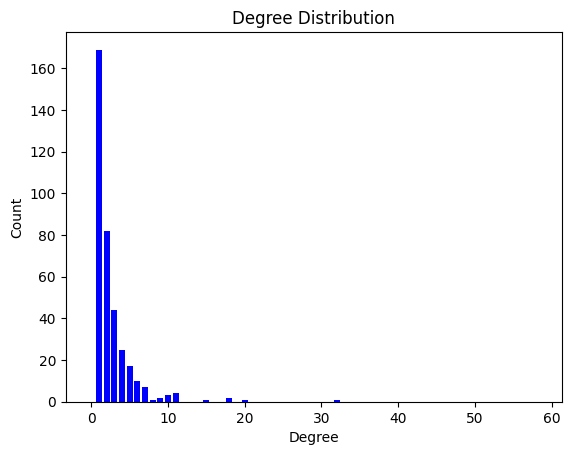

In [165]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# Get the degree of each vertex
# degrees = graph_list_ig[9].degree()
degrees = graph_reduce_list[9].degree()

# Create a histogram of the degrees
counts, bins = np.histogram(degrees, bins=range(0, 60 ))

# Plot the histogram
plt.bar(bins[:-1], counts, width=0.8, color='b')
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [166]:

for i, g in enumerate(graph_reduce_list):
    f1 = open(str(i)+'.edgelist', 'w')
    f2 = open(str(i)+'.comm', 'w')
    for e in g.es:
        source = e.source
        target = e.target
        f1.write(f'{source} {target}\n')
    for v in g.vs:
        node = v.index
        community = v["community"]
        f2.write(f'{node} {community}\n')
f1.close()
f2.close()


# READ SAMPLE EDGES FILE

In [485]:
import pandas as pd
import pyarrow.feather as feather
file_path = 'E:\\Network_Science\\14- Thesis\\Dataset\\Twitter\\Netlytic\\edges_2023-03-17.feather'
edges = pd.DataFrame(feather.read_feather(file_path))
edges = edges[:10000]
edges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 81957586 to 81967585
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   edge_source  10000 non-null  int64         
 1   edge_target  10000 non-null  int64         
 2   tweetid      10000 non-null  int64         
 3   description  10000 non-null  object        
 4   pubdate      10000 non-null  datetime64[ns]
 5   weight       10000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 546.9+ KB


IGRAPH U--- 11 11 -- 
+ attr: user_id (v), name (e)


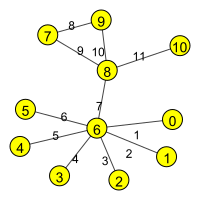

In [4]:
# Plot graph G2
import igraph as ig
import time
num_vertices = 11
edges = [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 8), (7, 9), (7, 8), (8, 9), (8, 10)]
# edges = [(0,5), (0,11), (1,2), (1,7), (2,3), (2,8), (3,4), (3,9), (4,12), (5,6), (5,7), (6,8), (6,11), (7,9), (8,10), (8,11), (9,10), (9,12), (10,11), (11,12)]
# edges = [(0,1), (0,5), (1,2), (1,6), (2,3), (2,7), (3,4), (3,8), (4,5), (5,9), (5,6), (6,7), (7,8), (7,10), (7,11), (8,9), (8,10), (9,11), (9,12), (10,11), (10,12), (0,3), (0,7), (1,8), (2,9), (2,4), (3,10), (4,11), (4,5), (5,12), (6,8), (6,9), (7,10), (8,11), (9,12), (10,11), (11,12)]
# edges = [(0,1), (0,5), (1,2), (1,6), (2,3), (2,8), (3,4), (3,9), (4,5), (4,10), (5,11), (5,6), (6,7), (7,12), (7,13), (8,9), (8,14), (9,15), (9,10), (10,16), (10,11), (11,17), (11,12), (12,13), (13,18), (13,14), (14,19), (15,16), (15,17), (16,18), (17,19)]
# edges = [(0,1), (0,5), (1,2), (1,6), (2,3), (3,7), (3,4), (4,8), (4,12), (5,9), (6,10), (6,7), (7,11), (8,13), (8,14), (9,15), (9,10), (10,16), (11,17), (12,18), (12,13), (13,19), (14,15), (16,17), (17,18)]
# edges = [(0,52), (0,4), (0,81), (0,53), (22, 75), (35, 43), (24, 82), (10, 71), (36, 68), (16, 40), (6, 61), (25, 19), (88, 30), (48, 83), (47, 79), (44, 80), (21, 27), (98, 31), (81, 52), (96, 87), (50, 45), (73, 90), (24, 31), (18, 35), (93, 59), (32, 84), (77, 99), (9, 42), (37, 89), (39, 94), (20, 53), (29, 67), (67, 49), (72, 95), (59, 78), (43, 85), (70, 26), (12, 46), (15, 38), (87, 47), (13, 17), (66, 92), (1, 44), (23, 26), (58, 64), (63, 97), (51, 69), (86, 90), (28, 48), (34, 41), (11, 28), (82, 44), (76, 89), (57, 74), (4, 32), (7, 33), (33, 39), (55, 80), (14, 56), (22, 60), (81, 89), (3, 55), (19, 54), (84, 91), (56, 73), (98, 100), (5, 17), (60, 96), (30, 62), (17, 29), (21, 45), (3, 41), (65, 92), (71, 88), (38, 76), (90, 96), (12, 23), (59, 68), (2, 46), (49, 72), (25, 37), (69, 77), (27, 51), (86, 96), (97, 99), (83, 96), (92, 95), (78, 100), (23, 50), (20, 42), (8, 76), (35, 74), (89, 99), (53, 86), (93, 98), (45, 90), (11, 15), (41, 90), (79, 82), (52, 86), (64, 93), (36, 62), (1, 31), (5, 38), (16, 18), (62, 86), (4, 75), (54, 73), (26, 40), (74, 91), (37, 67), (87, 94), (57, 82), (47, 51), (58, 92), (13, 46), (63, 87), (77, 92), (10, 32), (61, 92), (2, 19), (14, 99), (68, 84), (90, 97), (31, 55), (65, 76), (85, 97), (43, 61), (24, 38), (80, 89), (28, 54), (6, 29), (95, 100), (7, 66), (9, 72), (73, 94), (25, 66), (64, 88), (21, 78), (34, 59), (60, 77), (2, 40), (84, 99), (19, 39), (12, 23), (39, 69), (61, 80), (4, 48), (13, 63), (74, 85), (86, 96), (42, 71), (98, 100), (16, 18), (55, 83), (24, 44), (67, 89), (32, 70), (57, 94), (29, 91), (75, 99), (51, 58), (36, 87), (20, 26), (62, 92), (11, 72), (49, 95), (33, 68), (37, 94), (82, 98), (27, 90), (1, 41), (35, 79), (78, 95), (3, 76), (47, 69), (73, 89), (8, 53), (26, 84), (9, 74), (45, 93), (5, 22), (30, 46), (71, 92), (54, 82), (23, 97), (17, 93)]
G2 = ig.Graph(n=num_vertices, edges=edges)
G2.vs['user_id'] = range(len(G2.vs))
G2.es['name'] = range(1, len(G2.es)+1)
print(G2.summary())
ig.plot(G2, bbox=(200,200), vertex_label=G2.vs['user_id'], edge_label= G2.es['name'], vertex_color = 'yellow')
